Data loading

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('pipeline_leak_dataset.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,0.2245
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,0.2262
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,0.2305
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,0.2303
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,0.2202


In [2]:
# Get a summary of the DataFrame to check data types and missing values
print("\nDataFrame information:")
df.info()


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10292 entries, 0 to 10291
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Wellhead Temp. (C)                       10292 non-null  float64
 1   Wellhead Press (psi)                     10292 non-null  float64
 2   MMCFD- gas                               10292 non-null  float64
 3   BOPD (barrel of oil produced per day)    10292 non-null  float64
 4   BWPD (barrel of water produced per day)  10292 non-null  float64
 5   BSW - basic solid and water (%)          10292 non-null  float64
 6   CO2 mol. (%) @ 25 C & 1 Atm.             10292 non-null  float64
 7   Gas Grav.                                10292 non-null  float64
 8   CR-corrosion defect                      10292 non-null  float64
dtypes: float64(9)
memory usage: 723.8 KB


Data Transformation and Class Distribution

Calculated threshold for leaks (80th percentile): 0.2376

Class distribution of the 'leaks-status' column:
leaks-status
No Leak    8231
Leak       2061
Name: count, dtype: int64


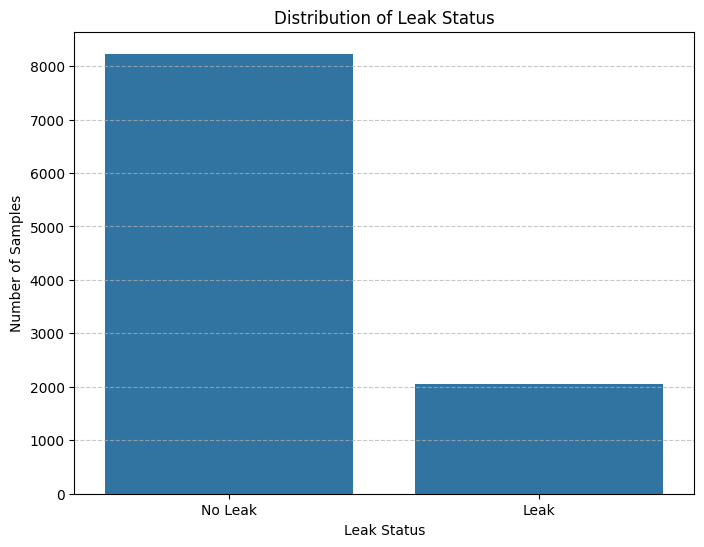


First 5 rows of the dataset with the new 'leaks-status' column:


,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect,leaks-status
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,0.2245,No Leak
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,0.2262,No Leak
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,0.2305,No Leak
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,0.2303,No Leak
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,0.2202,No Leak


In [16]:
# Calculate the 80th percentile of the 'CR-corrosion defect' column
corrosion_threshold = df['CR-corrosion defect'].quantile(0.80)
print(f"Calculated threshold for leaks (80th percentile): {corrosion_threshold:.4f}")

# Convert the 'CR-corrosion defect' column to the 'leaks-status' target column
df['leaks-status'] = df['CR-corrosion defect'].apply(lambda x: 'Leak' if x >= corrosion_threshold else 'No Leak')

# Display the value counts for the new target column
print("\nClass distribution of the 'leaks-status' column:")
print(df['leaks-status'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='leaks-status', data=df)
plt.title('Distribution of Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the first few rows with the new column
print("\nFirst 5 rows of the dataset with the new 'leaks-status' column:")
df.head()

Exploratory Data Analysis (EDA) and Visualization

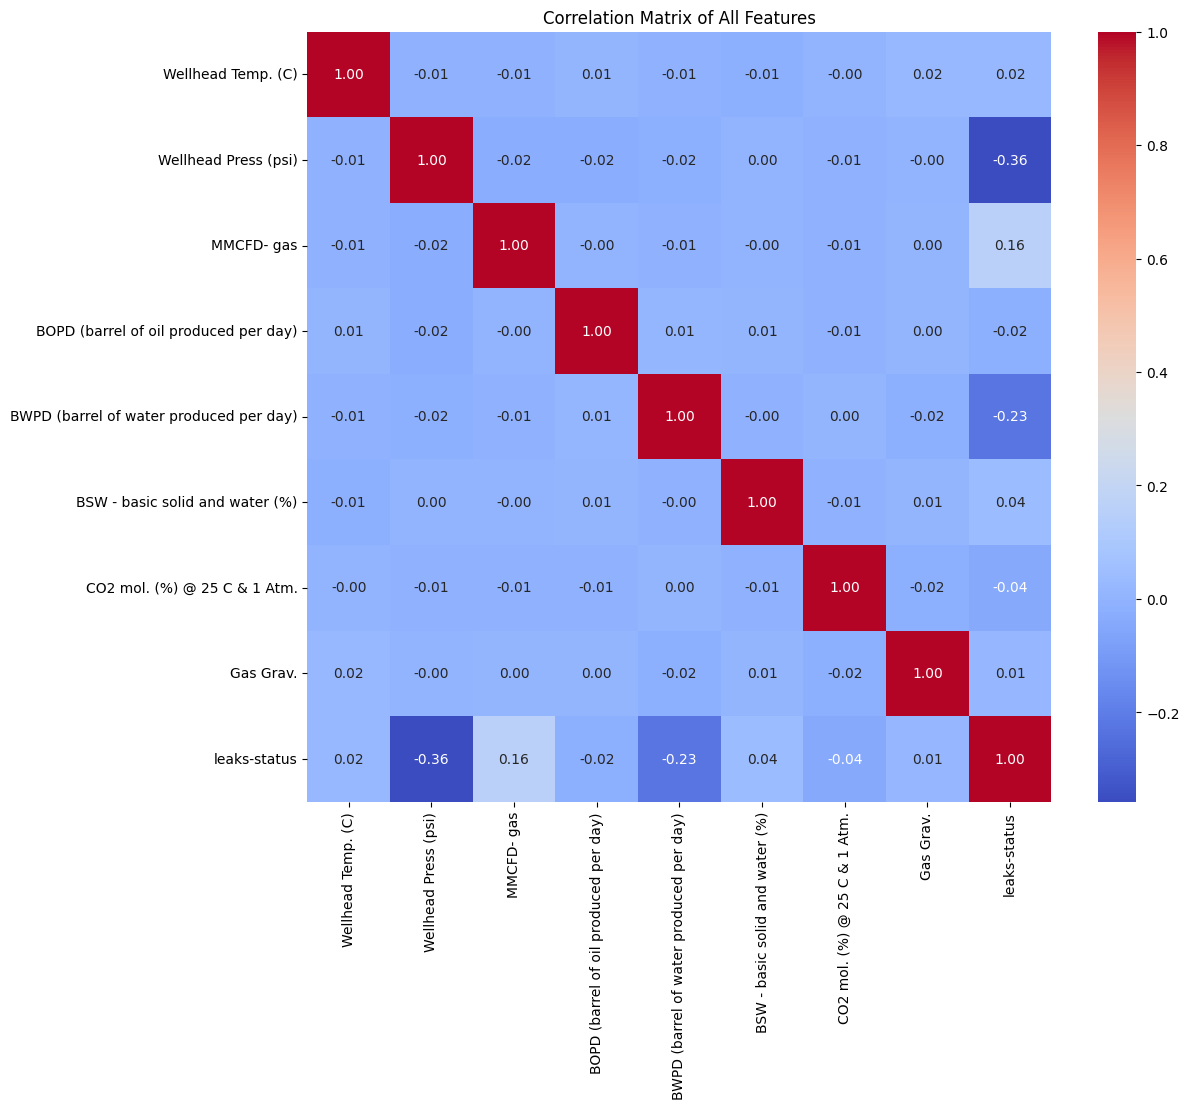

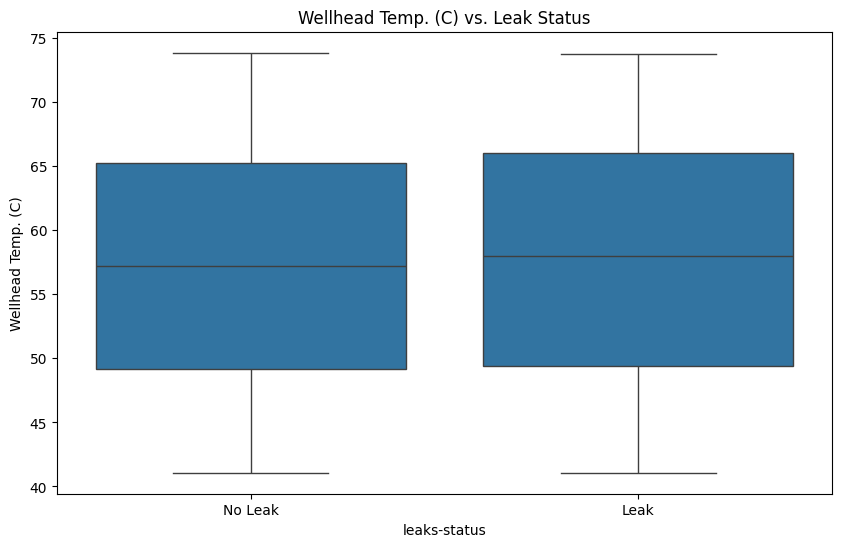

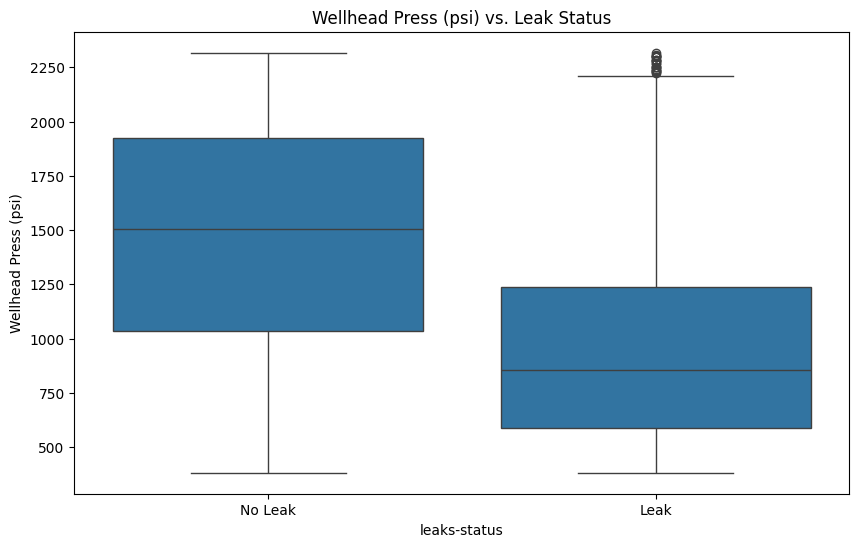

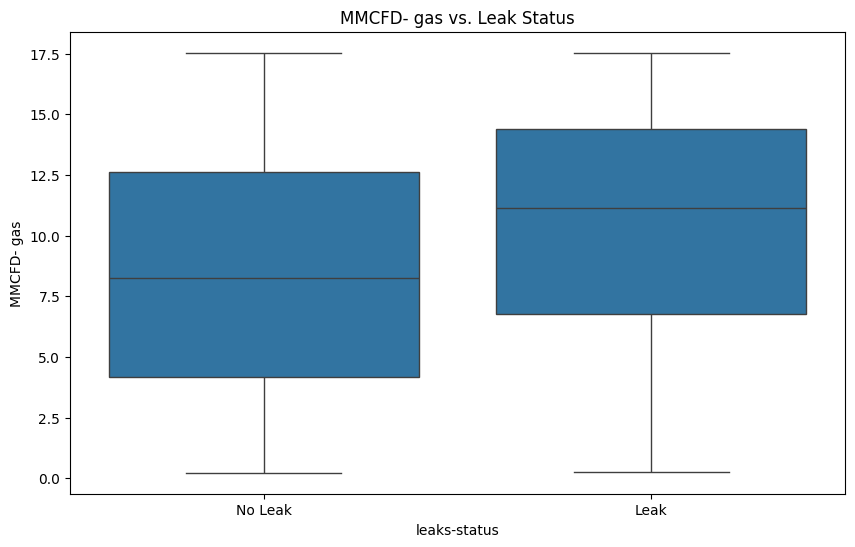

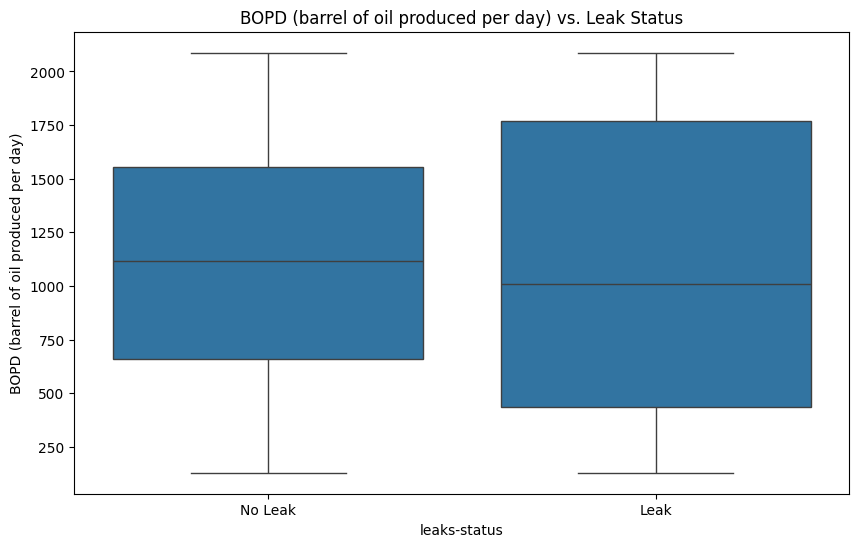

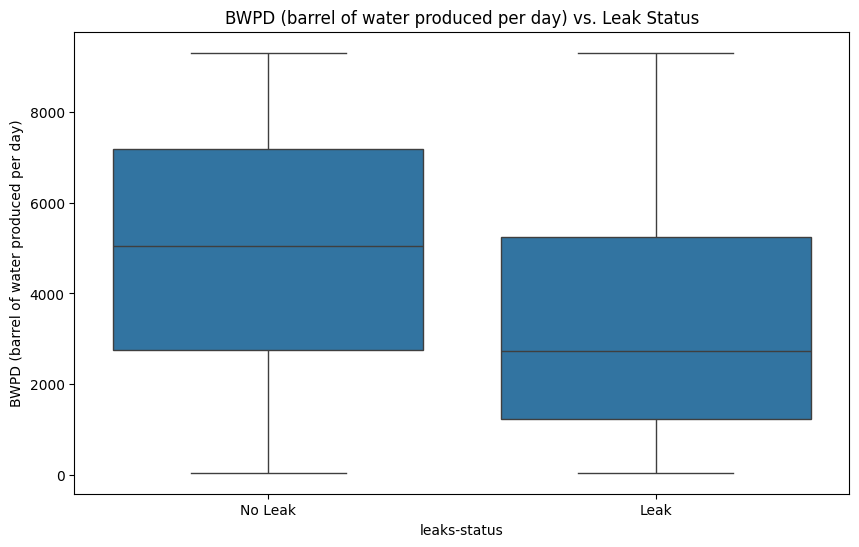

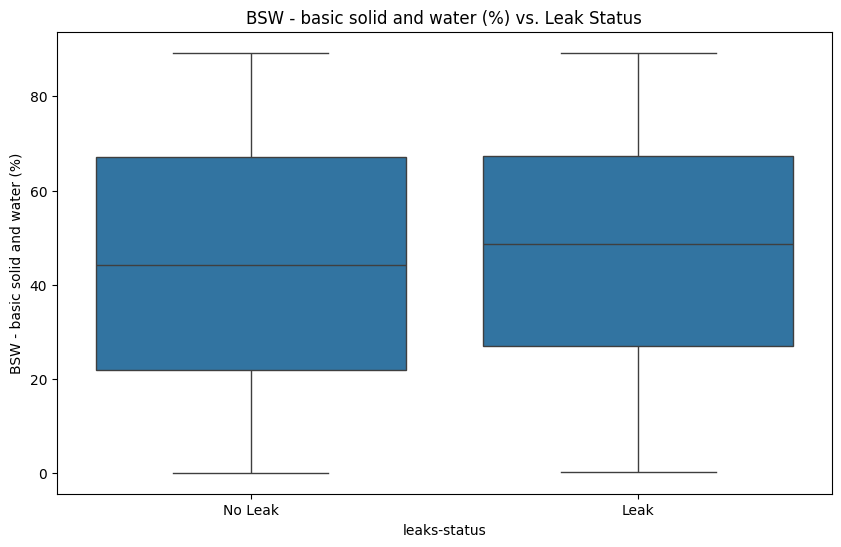

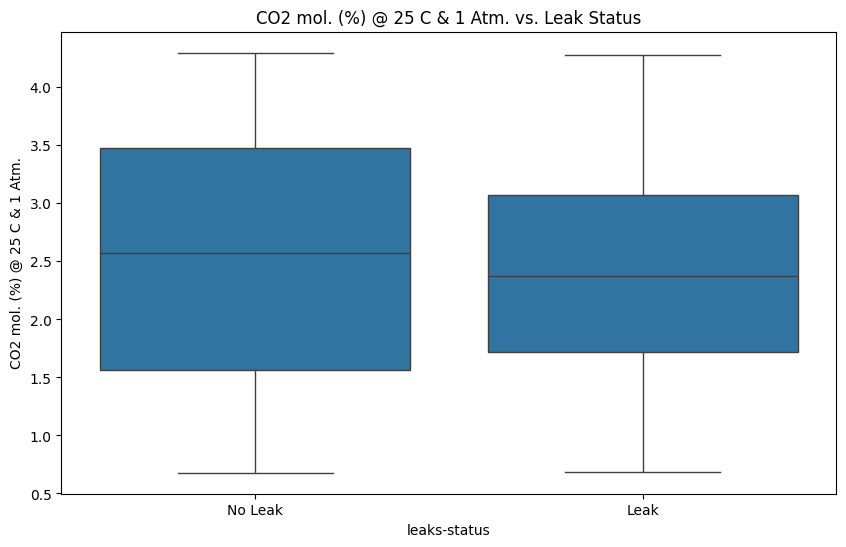

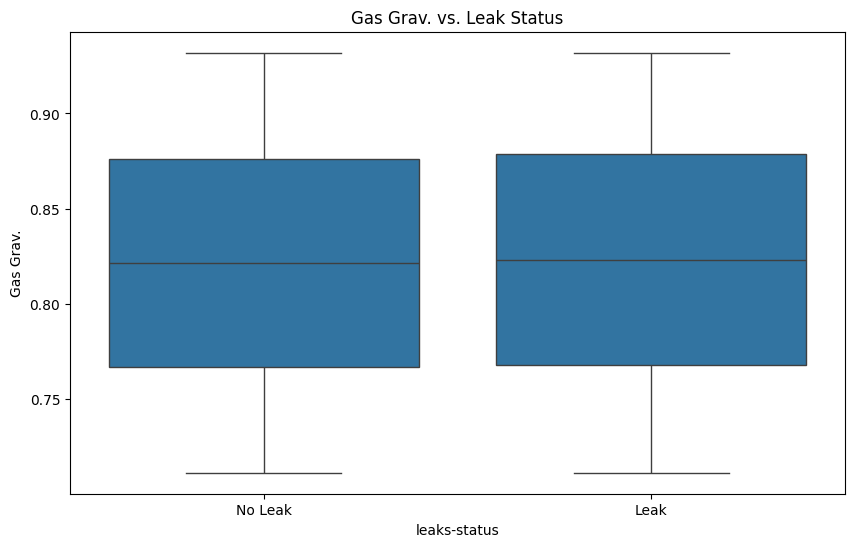

In [17]:
# Create a copy of the dataframe for EDA
eda_df = df.copy()

# Drop the original 'CR-corrosion defect' column as we have the new target
eda_df = eda_df.drop('CR-corrosion defect', axis=1)

# Convert the 'leaks-status' column to numerical for correlation analysis
eda_df['leaks-status'] = eda_df['leaks-status'].map({'No Leak': 0, 'Leak': 1})

# Calculate the correlation matrix
correlation_matrix = eda_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

# Visualize the relationship between features and the target variable using box plots
features = ['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas', 'BOPD (barrel of oil produced per day)', 'BWPD (barrel of water produced per day)', 'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.', 'Gas Grav.']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='leaks-status', y=feature, data=df)
    plt.title(f'{feature} vs. Leak Status')
    plt.show()

Data Preprocessing and Splitting (Train, Validation, Test Sets)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = df.drop(['leaks-status', 'CR-corrosion defect'], axis=1)
y = df['leaks-status'].map({'No Leak': 0, 'Leak': 1})

# Step 1: Split the data into a training set and a temporary set (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Step 2: Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform all three sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the new datasets to confirm the split
print("Shape of original X:", X.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_val_scaled:", X_val_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

print("\nTrain, Validation, and Test Set Class Distributions:")
print("Train Set:", pd.Series(y_train).value_counts(normalize=True))
print("Validation Set:", pd.Series(y_val).value_counts(normalize=True))
print("Test Set:", pd.Series(y_test).value_counts(normalize=True))


Shape of original X: (10292, 8)
Shape of X_train_scaled: (6175, 8)
Shape of X_val_scaled: (2058, 8)
Shape of X_test_scaled: (2059, 8)

Train, Validation, and Test Set Class Distributions:
Train Set: leaks-status
0    0.799676
1    0.200324
Name: proportion, dtype: float64
Validation Set: leaks-status
0    0.799806
1    0.200194
Name: proportion, dtype: float64
Test Set: leaks-status
0    0.799903
1    0.200097
Name: proportion, dtype: float64


Learning Curve and Cross-Validation Metrics for Baseline Model

Generating learning curve for F1 Score...


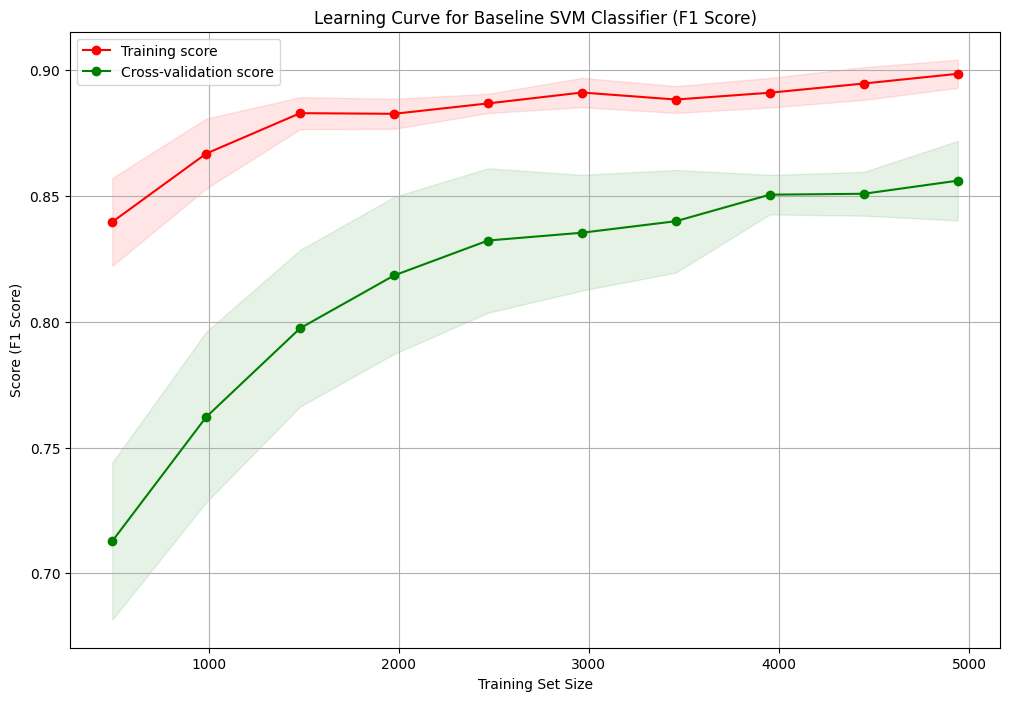

Generating learning curve for Precision...


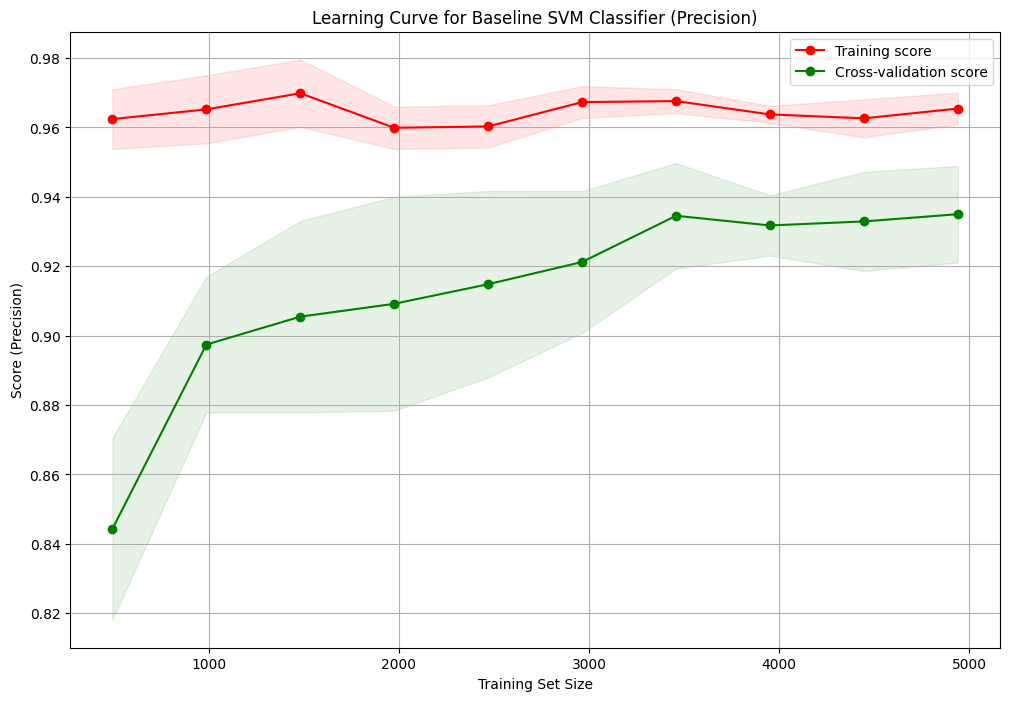

Generating learning curve for Recall...


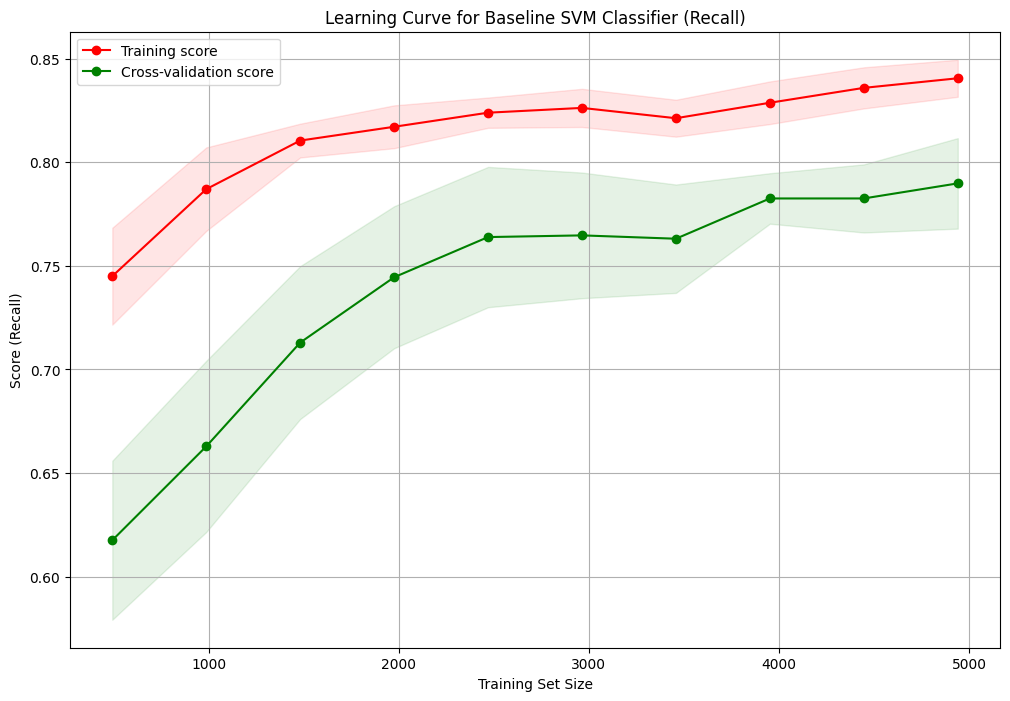


Cross-Validation Scores (Mean ± Std Dev):
- F1 Macro: 0.91 ± 0.01
- Precision: 0.93 ± 0.01
- Recall: 0.79 ± 0.02


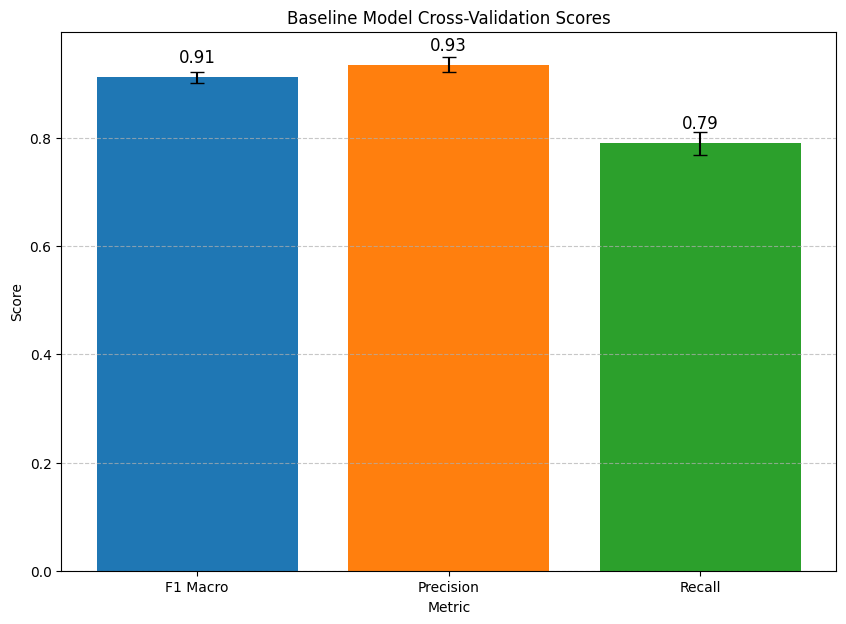

In [21]:
from sklearn.model_selection import learning_curve, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Initialize the baseline SVM model
model = SVC(random_state=42)

# Initialize StratifiedKFold to ensure a balanced class distribution in each fold
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Generate and Plot Learning Curves for All Metrics ---

# Define the metrics to plot. We use 'f1' (for the binary case), 'precision', and 'recall'.
scoring_metrics = {
    'F1 Score': 'f1',
    'Precision': 'precision',
    'Recall': 'recall'
}

# Generate and plot a learning curve for each metric
for metric_name, scorer in scoring_metrics.items():
    print(f"Generating learning curve for {metric_name}...")

    # Generate the learning curve data using stratified cross-validation on the training set
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train_scaled,
        y_train,
        cv=cv_stratified,  # Use the stratified cross-validation object here
        scoring=scorer,
        train_sizes=np.linspace(0.1, 1.0, 10),  # Evaluate at 10 different training sizes
        n_jobs=-1  # Use all available CPU cores
    )

    # Calculate the mean and standard deviation of the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(12, 8))

    # Plotting the training scores with a shaded region for standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plotting the cross-validation scores with a shaded region for standard deviation
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(f'Learning Curve for Baseline SVM Classifier ({metric_name})')
    plt.xlabel('Training Set Size')
    plt.ylabel(f'Score ({metric_name})')
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# --- Cross-Validation Scores for Multiple Metrics ---

# Define the scoring metrics
scoring = {
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision': 'precision',
    'recall': 'recall'
}

# Perform cross-validation for each metric
cv_scores = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_stratified, scoring=scorer, n_jobs=-1)
    cv_scores[metric_name] = scores

# Print the mean and standard deviation for each metric
print("\nCross-Validation Scores (Mean ± Std Dev):")
for metric_name, scores in cv_scores.items():
    print(f"- {metric_name.replace('_', ' ').title()}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Plot a bar chart of the cross-validation scores
plt.figure(figsize=(10, 7))
mean_scores = [np.mean(s) for s in cv_scores.values()]
std_scores = [np.std(s) for s in cv_scores.values()]
metric_names = [s.replace('_', ' ').title() for s in cv_scores.keys()]

plt.bar(metric_names, mean_scores, yerr=std_scores, capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Baseline Model Cross-Validation Scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the scores on top of each bar
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

Baseline SVM Model Training & Evaluation, and Threshold Plotting

Training Baseline SVM model...

--- Baseline Model Performance on Validation Set ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1646
           1       0.93      0.83      0.87       412

    accuracy                           0.95      2058
   macro avg       0.94      0.90      0.92      2058
weighted avg       0.95      0.95      0.95      2058



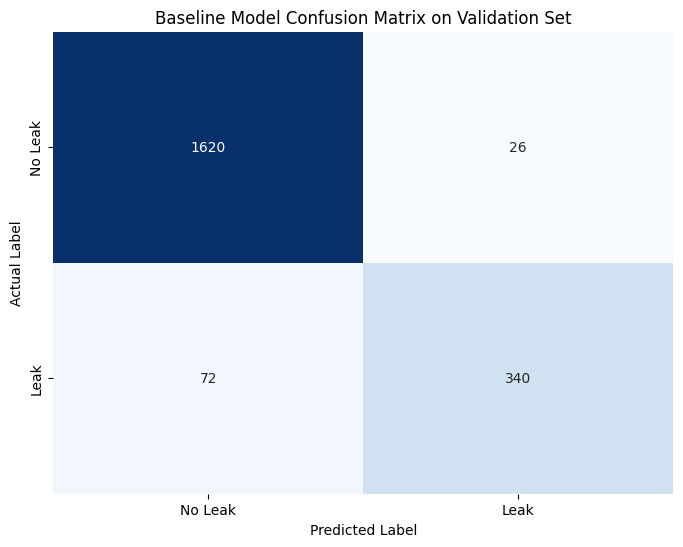

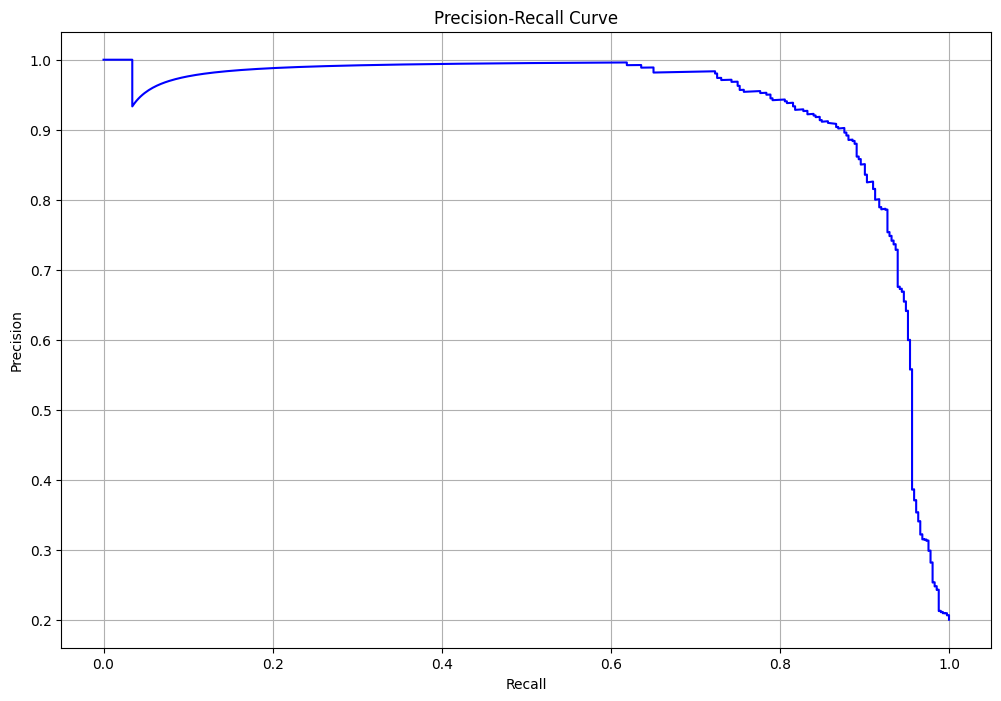

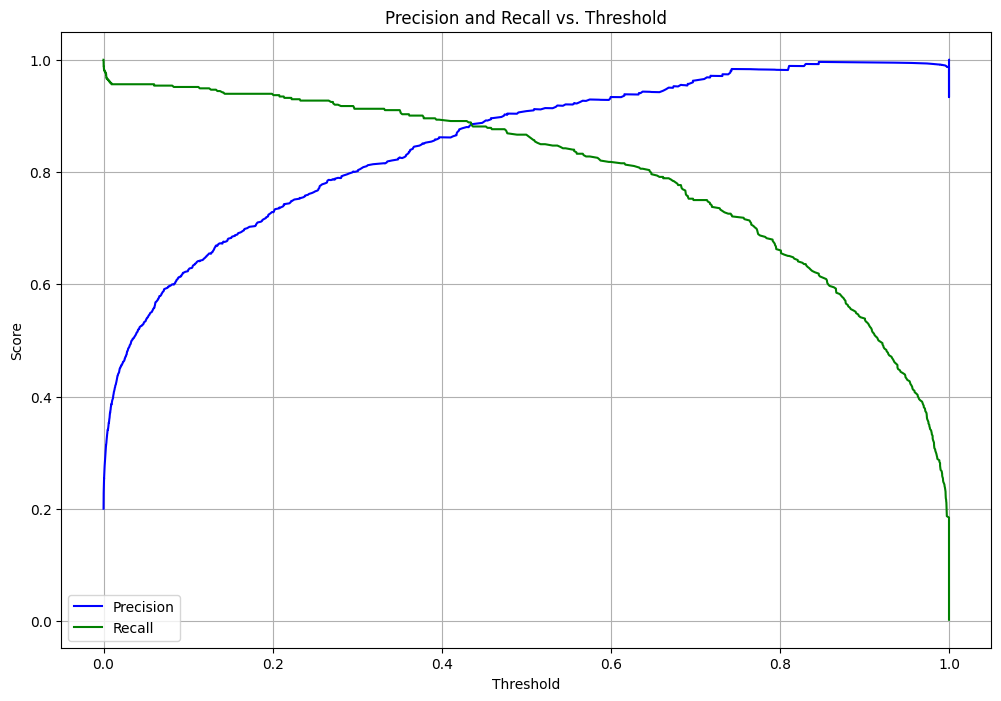

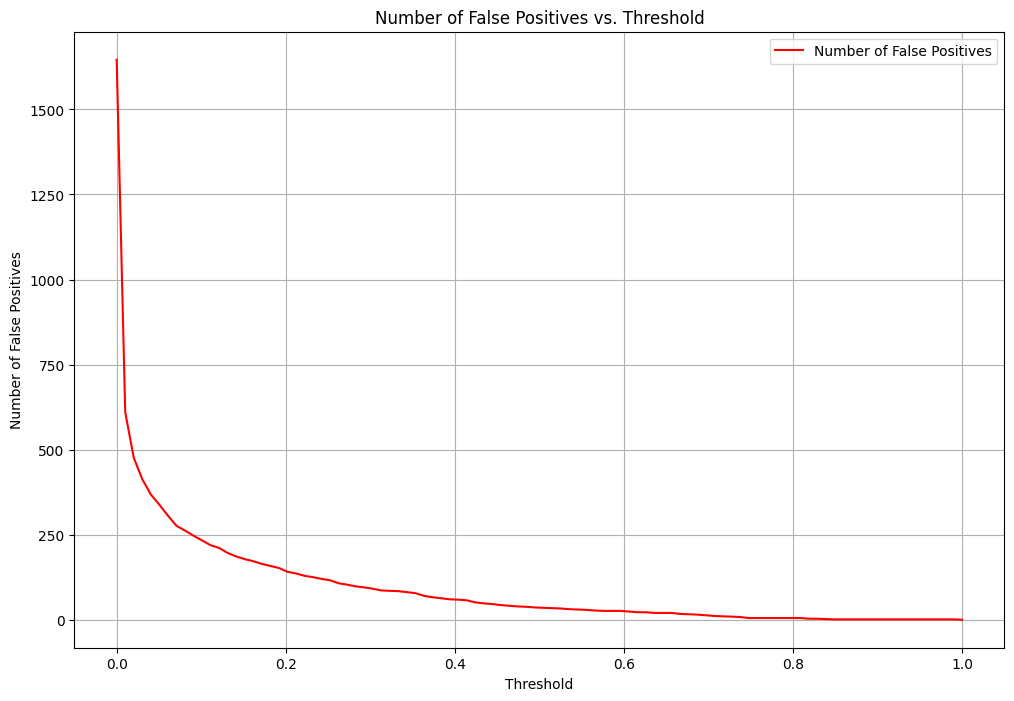


--- Optimal Threshold for Maximum F1-score ---
Optimal Threshold: 0.4744
Maximum F1-score at this threshold: 0.8892


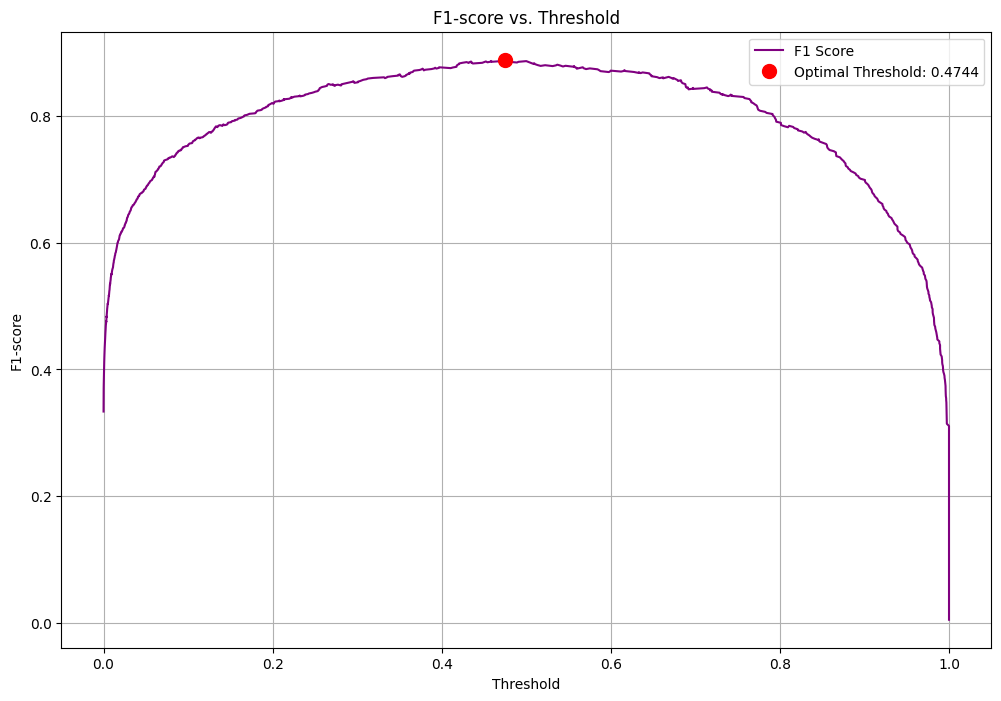

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Baseline Model Training and Evaluation ---

# Initialize the baseline SVM model
model = SVC(random_state=42, probability=True)

# Train the model on the scaled training data
print("Training Baseline SVM model...")
model.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled validation data
print("\n--- Baseline Model Performance on Validation Set ---")
y_pred_val = model.predict(X_val_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Plot the Confusion Matrix
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title('Baseline Model Confusion Matrix on Validation Set')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Plotting Metrics vs. Threshold ---

# Get the probability scores for the validation set
y_probs = model.predict_proba(X_val_scaled)[:, 1]

# Define a range of thresholds to test
thresholds_to_plot = np.linspace(0.0, 1.0, 100)

# Calculate precision and recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_probs)

# plot the Precision-Recall curve without the threshold
plt.figure(figsize=(12, 8))
plt.plot(recalls, precisions, 'b-')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Plot Precision and Recall vs. Threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate and plot the number of False Positives vs. Threshold
false_positives = []
for t in thresholds_to_plot:
    y_pred_at_t = (y_probs >= t).astype(int)
    fp = np.sum((y_pred_at_t == 1) & (y_val == 0))
    false_positives.append(fp)

plt.figure(figsize=(12, 8))
plt.plot(thresholds_to_plot, false_positives, 'r-', label='Number of False Positives')
plt.title('Number of False Positives vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of False Positives')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# --- Finding and Printing the Optimal Threshold ---

# Calculate the F1-score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that gives the maximum F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
max_f1_score = f1_scores[optimal_threshold_index]

print("\n--- Optimal Threshold for Maximum F1-score ---")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum F1-score at this threshold: {max_f1_score:.4f}")

# Plot the F1-score vs. Threshold to visualize the optimal point
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores[:-1], 'purple', label='F1 Score')
plt.plot(optimal_threshold, max_f1_score, 'ro', markersize=10, label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.title('F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Re-evaluating Model Performance with the Optimal Threshold

--- Re-evaluated Model Performance on Validation Set with Optimal Threshold ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1646
           1       0.90      0.88      0.89       412

    accuracy                           0.96      2058
   macro avg       0.94      0.93      0.93      2058
weighted avg       0.96      0.96      0.96      2058



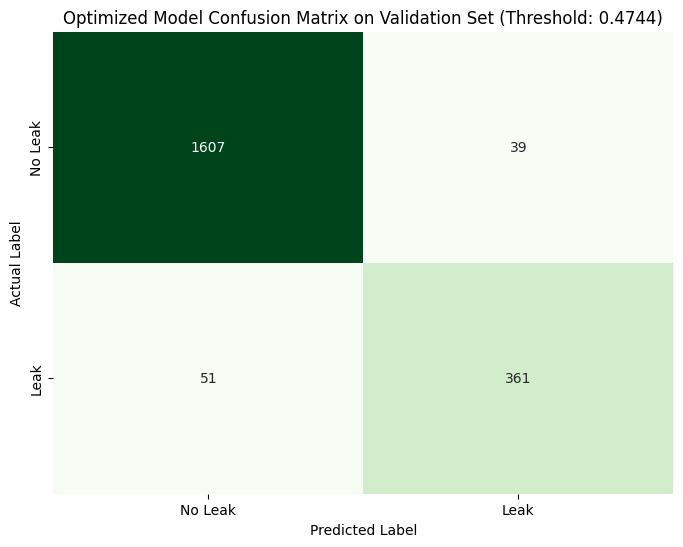

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make new predictions based on the optimal threshold from the previous cell
y_pred_val_optimized = (y_probs >= optimal_threshold).astype(int)

# Re-evaluate the model with the new predictions
print("--- Re-evaluated Model Performance on Validation Set with Optimal Threshold ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_val_optimized))

# Plot the new Confusion Matrix
conf_matrix_optimized = confusion_matrix(y_val, y_pred_val_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Optimized Model Confusion Matrix on Validation Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Final BaseLine Model Evaluation on the Test Set

--- Final Model Performance on Test Set with Optimal Threshold ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1647
           1       0.90      0.89      0.90       412

    accuracy                           0.96      2059
   macro avg       0.94      0.93      0.94      2059
weighted avg       0.96      0.96      0.96      2059



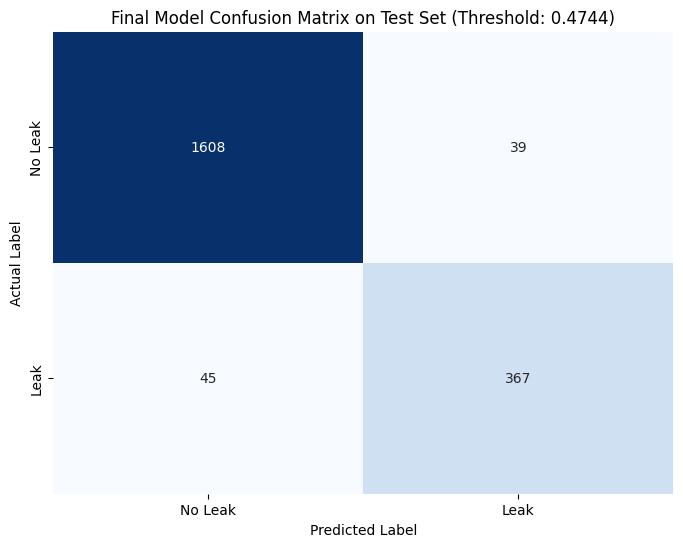

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probability scores for the test set using the trained model
y_probs_test = model.predict_proba(X_test_scaled)[:, 1]

# Make new predictions for the test set based on the optimal threshold
# from the validation set
y_pred_test_optimized = (y_probs_test >= optimal_threshold).astype(int)

# Evaluate the model with the new predictions on the test set
print("--- Final Model Performance on Test Set with Optimal Threshold ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_optimized))

# Plot the final Confusion Matrix
conf_matrix_test_optimized = confusion_matrix(y_test, y_pred_test_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_optimized, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Final Model Confusion Matrix on Test Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Hyperparameter Tuning for the Baseline Model

Performing Grid Search for hyperparameter tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation F1-macro score: 0.94

--- Tuned Model Performance on Validation Set ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1646
           1       0.96      0.87      0.91       412

    accuracy                           0.97      2058
   macro avg       0.96      0.93      0.94      2058
weighted avg       0.97      0.97      0.96      2058



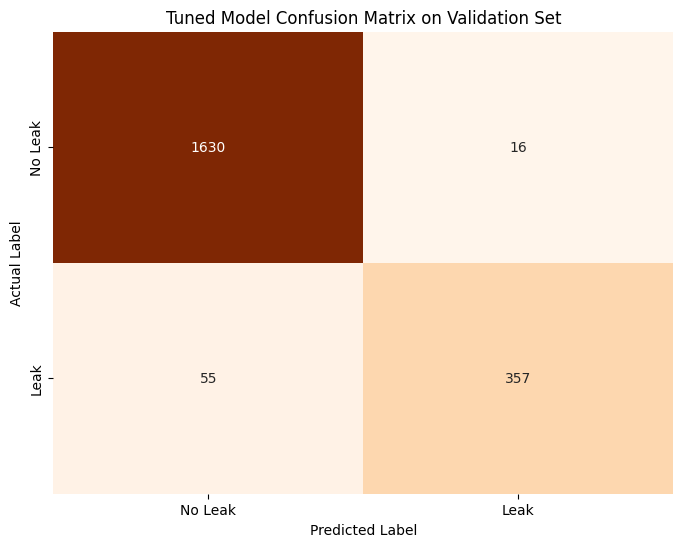

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the SVM model
model = SVC(random_state=42, probability=True)

# Define the hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# We'll use F1-macro as the scoring metric for the grid search, as it's
# more robust for imbalanced datasets
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv_stratified, scoring=f1_macro_scorer, n_jobs=-1, verbose=1)

# Fit the grid search to the scaled training data
print("Performing Grid Search for hyperparameter tuning...")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation F1-macro score: {:.2f}".format(grid_search.best_score_))

# Get the best model from the grid search
svm_tuned = grid_search.best_estimator_

# Evaluate the tuned model on the validation set
y_pred_tuned = svm_tuned.predict(X_val_scaled)
print("\n--- Tuned Model Performance on Validation Set ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_tuned))

# Plot the Confusion Matrix
conf_matrix_tuned = confusion_matrix(y_val, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title('Tuned Model Confusion Matrix on Validation Set')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Evaluation, and Threshold Plotting for Tuned Baseline Model

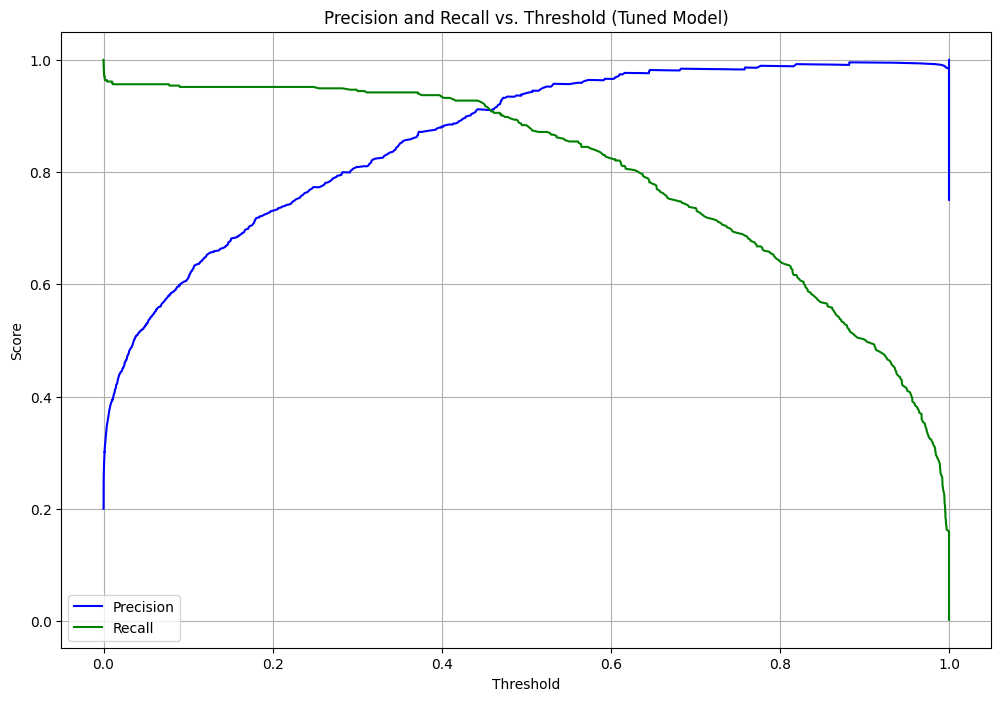


--- Optimal Threshold for Tuned Model (Maximum F1-score) ---
Optimal Threshold: 0.4422
Maximum F1-score at this threshold: 0.9194


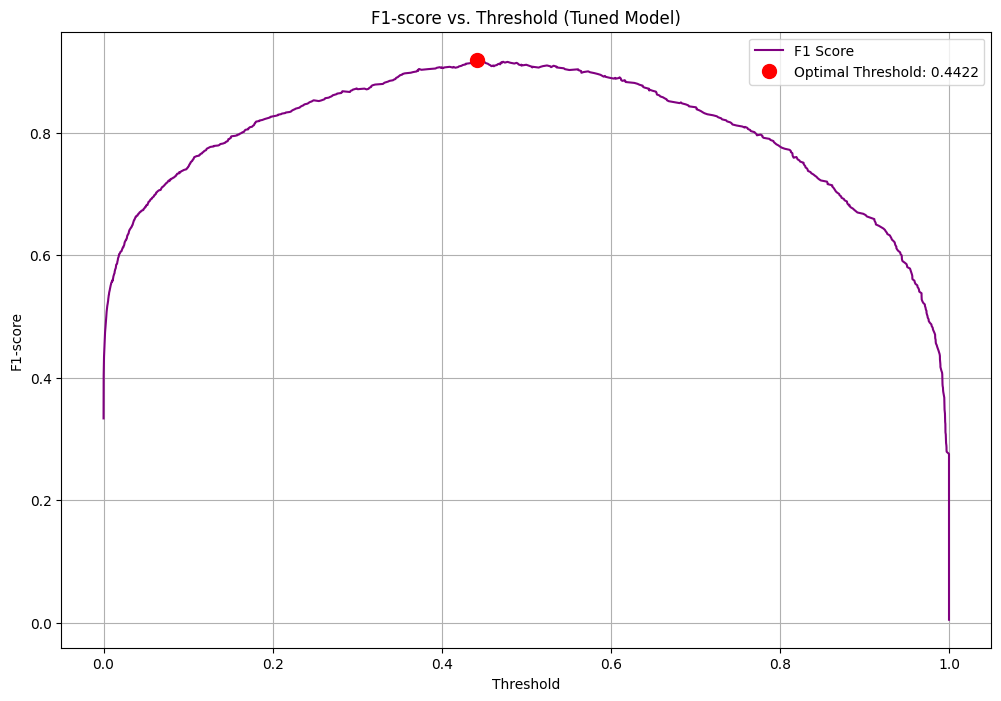

In [26]:
# Get the probability scores for the validation set
y_probs_tuned = svm_tuned.predict_proba(X_val_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precisions_tuned, recalls_tuned, thresholds_tuned = precision_recall_curve(y_val, y_probs_tuned)

# Plot Precision and Recall vs. Threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds_tuned, precisions_tuned[:-1], 'b-', label='Precision')
plt.plot(thresholds_tuned, recalls_tuned[:-1], 'g-', label='Recall')
plt.title('Precision and Recall vs. Threshold (Tuned Model)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# --- Finding and Printing the Optimal Threshold for the Tuned Model ---

# Calculate the F1-score for each threshold
f1_scores_tuned = 2 * (precisions_tuned * recalls_tuned) / (precisions_tuned + recalls_tuned)

# Find the threshold that gives the maximum F1-score
optimal_threshold_index_tuned = np.argmax(f1_scores_tuned)
optimal_threshold_tuned = thresholds_tuned[optimal_threshold_index_tuned]
max_f1_score_tuned = f1_scores_tuned[optimal_threshold_index_tuned]

print("\n--- Optimal Threshold for Tuned Model (Maximum F1-score) ---")
print(f"Optimal Threshold: {optimal_threshold_tuned:.4f}")
print(f"Maximum F1-score at this threshold: {max_f1_score_tuned:.4f}")

# Plot the F1-score vs. Threshold to visualize the optimal point
plt.figure(figsize=(12, 8))
plt.plot(thresholds_tuned, f1_scores_tuned[:-1], 'purple', label='F1 Score')
plt.plot(optimal_threshold_tuned, max_f1_score_tuned, 'ro', markersize=10, label=f'Optimal Threshold: {optimal_threshold_tuned:.4f}')
plt.title('F1-score vs. Threshold (Tuned Model)')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Re-evaluating Model Performance with the Optimal Threshold on tuned model

--- Re-evaluated Tuned Model Performance on Validation Set with Optimal Threshold ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1646
           1       0.91      0.93      0.92       412

    accuracy                           0.97      2058
   macro avg       0.95      0.95      0.95      2058
weighted avg       0.97      0.97      0.97      2058



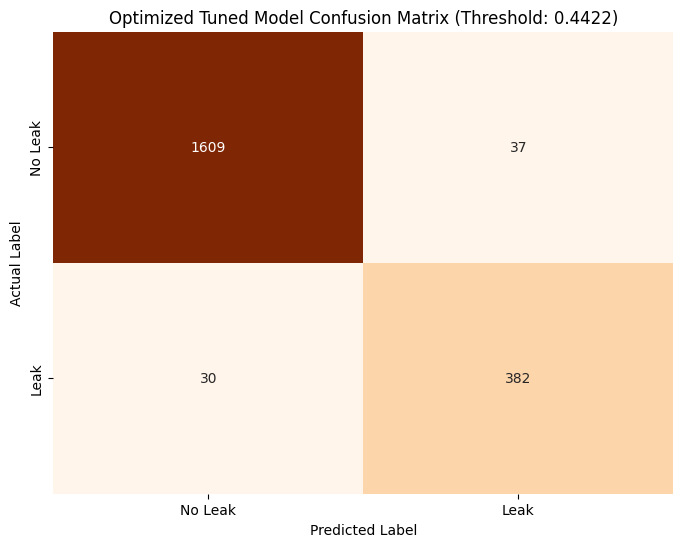

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probability scores for the validation set using the tuned model
y_probs_tuned = svm_tuned.predict_proba(X_val_scaled)[:, 1]

# Make new predictions based on the optimal threshold from the previous cell
y_pred_val_optimized_tuned = (y_probs_tuned >= optimal_threshold_tuned).astype(int)

# Re-evaluate the tuned model with the new predictions
print("--- Re-evaluated Tuned Model Performance on Validation Set with Optimal Threshold ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_val_optimized_tuned))

# Plot the new Confusion Matrix
conf_matrix_optimized_tuned = confusion_matrix(y_val, y_pred_val_optimized_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Optimized Tuned Model Confusion Matrix (Threshold: {optimal_threshold_tuned:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Final BaseLine Tuned Model Evaluation on the Test Set

--- Final Model Performance on Test Set with Optimal Threshold ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1647
           1       0.91      0.92      0.92       412

    accuracy                           0.97      2059
   macro avg       0.95      0.95      0.95      2059
weighted avg       0.97      0.97      0.97      2059



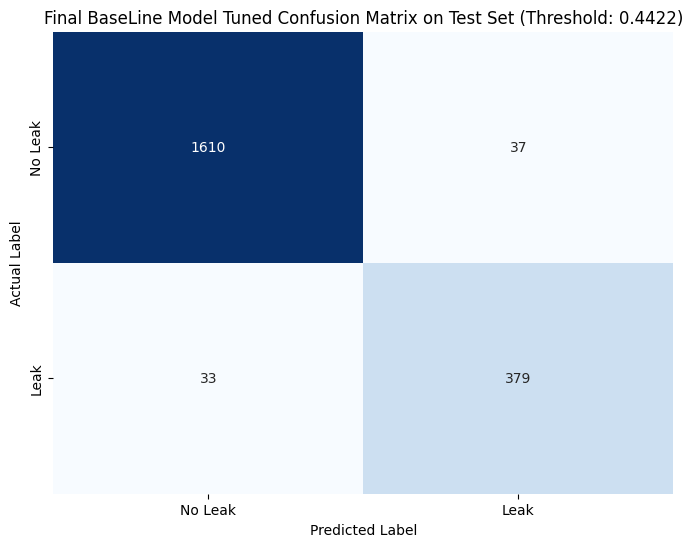

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probability scores for the test set using the trained model
y_probs_test_tuned = svm_tuned.predict_proba(X_test_scaled)[:, 1]

# Make new predictions for the test set based on the optimal threshold
# from the validation set
y_pred_test_tuned_optimized = (y_probs_test_tuned >= optimal_threshold_tuned).astype(int)

# Evaluate the model with the new predictions on the test set
print("--- Final Model Performance on Test Set with Optimal Threshold ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_tuned_optimized))

# Plot the final Confusion Matrix
conf_matrix_test_tuned_optimized = confusion_matrix(y_test, y_pred_test_tuned_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_tuned_optimized, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Final BaseLine Model Tuned Confusion Matrix on Test Set (Threshold: {optimal_threshold_tuned:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Data Resampling with SMOTE

In [29]:
from imblearn.over_sampling import SVMSMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Resampling the Training Data ---

# Print the original class distribution of the training set
print("Original class distribution:", Counter(y_train))

# Initialize the SVMSMOTE oversampler
sm = SVMSMOTE(random_state=42, k_neighbors=3)

# Apply SVMSMOTE to the training data.
print("Resampling training data with SVMSMOTE...")
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# Print the new, balanced class distribution
print("New class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({0: 4938, 1: 1237})
Resampling training data with SVMSMOTE...
New class distribution: Counter({0: 4938, 1: 4938})


Learning Curves and Cross-Validation for Resampled Data

Generating learning curves for the model trained on resampled data...
Generating learning curve for F1 Score...


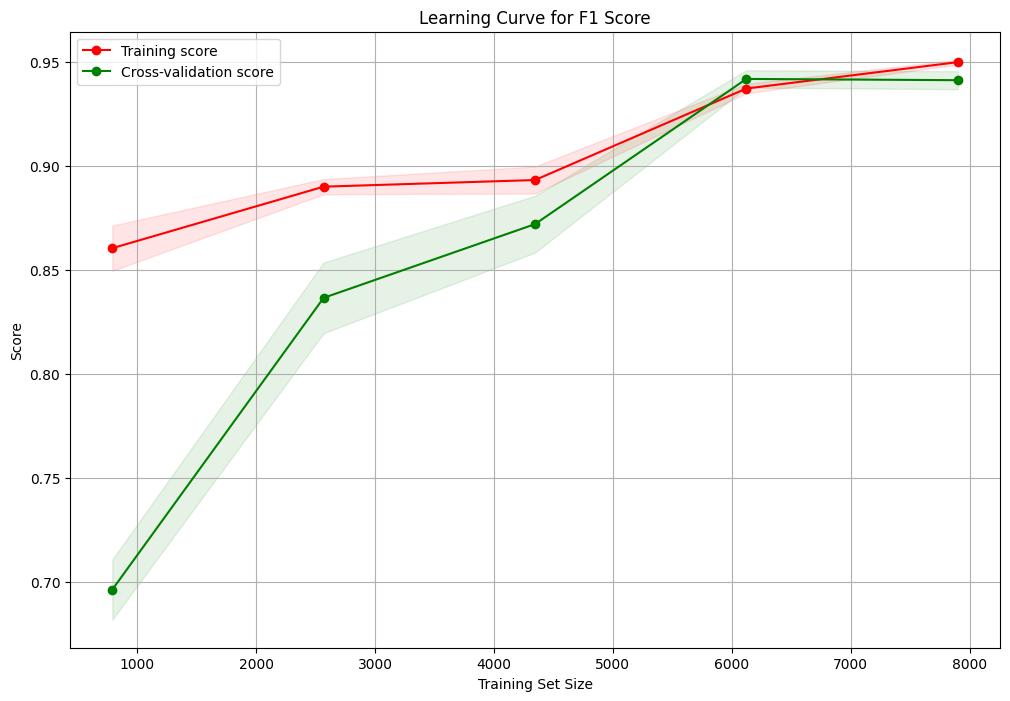

Generating learning curve for Precision...


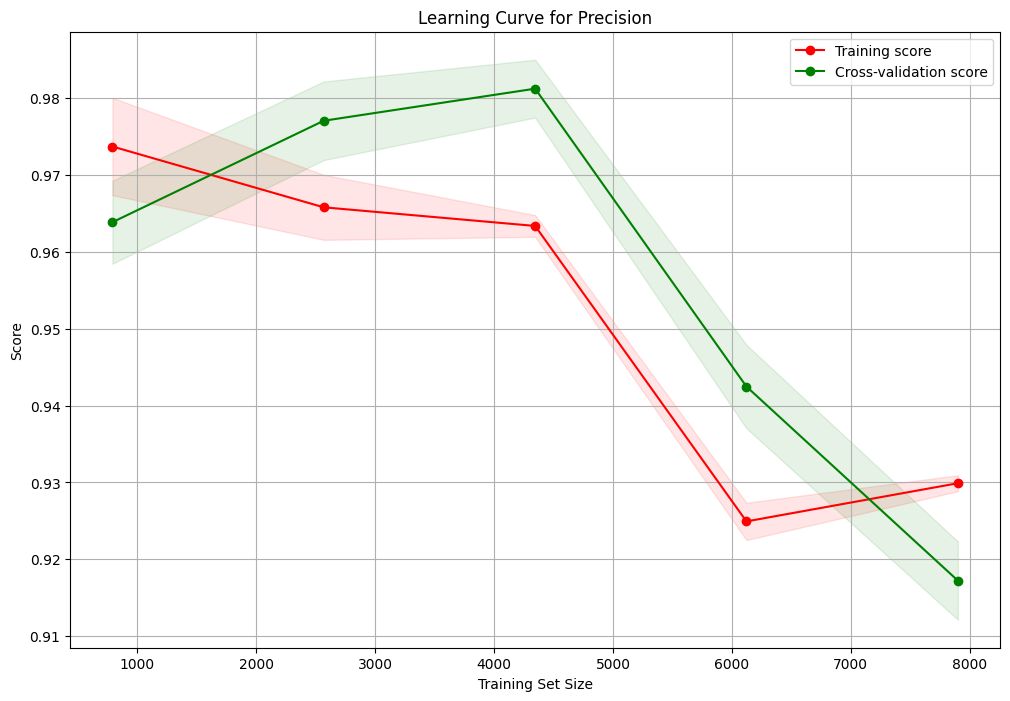

Generating learning curve for Recall...


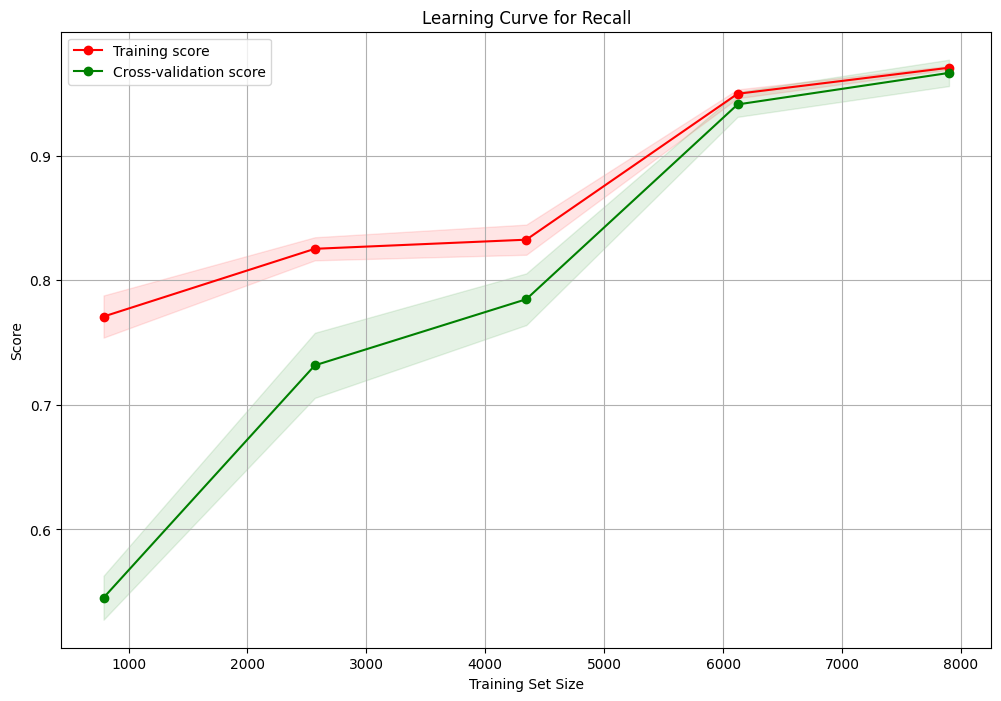

Generating learning curve for Accuracy...


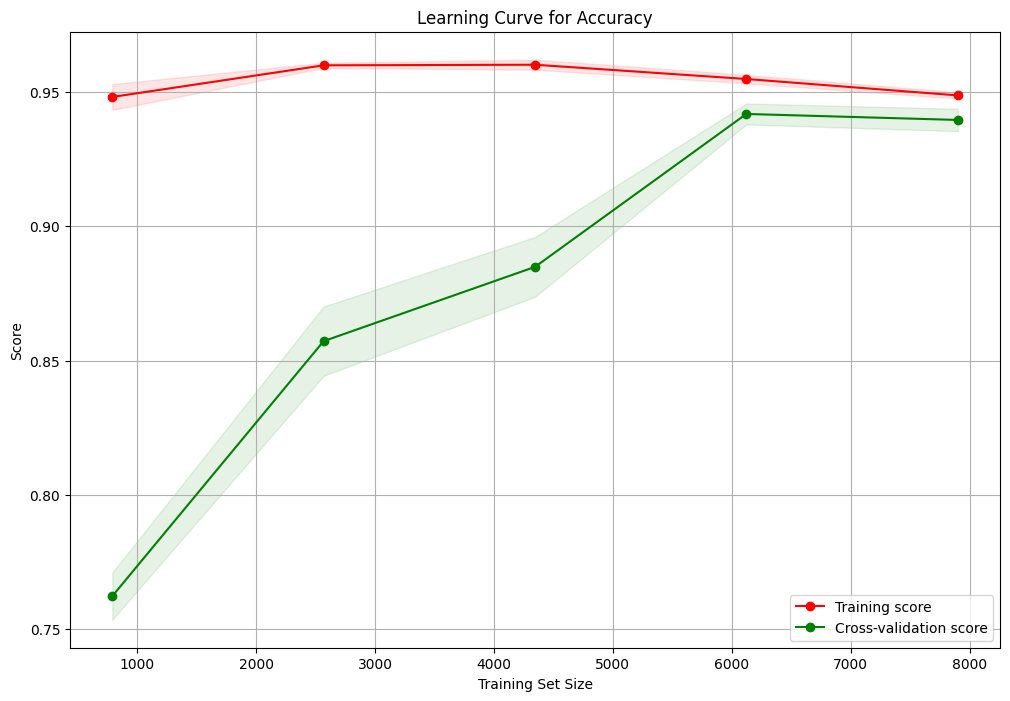


Performing cross-validation to get final metrics...
Cross-Validation Scores (Mean and Standard Deviation):
  F1_score: 0.9411 (+/- 0.0043)
  Precision: 0.9172 (+/- 0.0051)
  Recall: 0.9664 (+/- 0.0106)
  Accuracy: 0.9395 (+/- 0.0042)


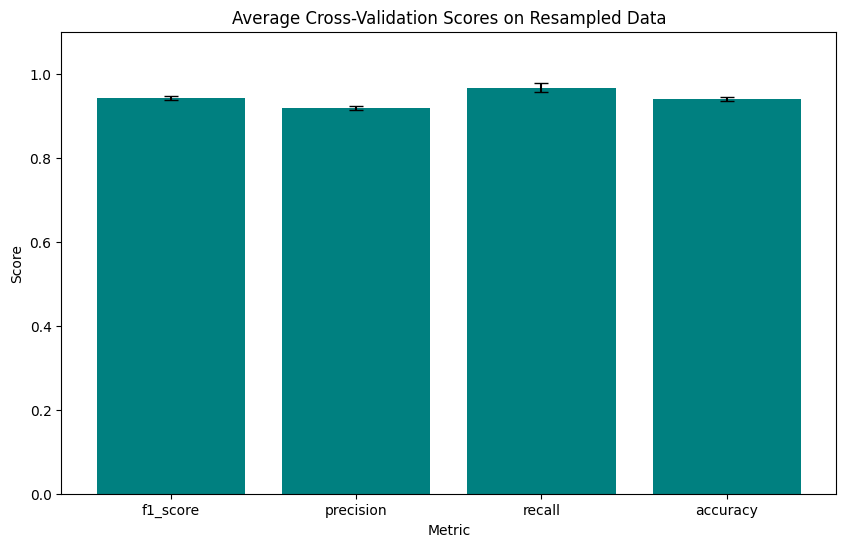

In [30]:
from sklearn.model_selection import learning_curve, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model to be trained on the resampled data
model_smote = SVC(random_state=42)

# --- Generate and Plot Learning Curves for All Metrics ---

print("Generating learning curves for the model trained on resampled data...")

# Define the scoring metrics
scoring_metrics = {
    'F1 Score': 'f1',
    'Precision': 'precision',
    'Recall': 'recall',
    'Accuracy': 'accuracy'
}

# Generate and plot a learning curve for each metric
for metric_name, scorer in scoring_metrics.items():
    print(f"Generating learning curve for {metric_name}...")

    train_sizes, train_scores, val_scores = learning_curve(
        model_smote,
        X_train_resampled,
        y_train_resampled,
        cv=cv_stratified,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring=scorer
    )
    
    # Calculate the mean and standard deviation of the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(12, 8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(f'Learning Curve for {metric_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# --- Cross-Validation Scores for Multiple Metrics ---

print("\nPerforming cross-validation to get final metrics...")

# Define the scoring dictionary with make_scorer for cross_validate
scoring_dict = {
    'f1_score': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score)
}

# Perform cross-validation with multiple metrics
cv_results = cross_validate(
    model_smote,
    X_train_resampled,
    y_train_resampled,
    cv=cv_stratified, 
    scoring=scoring_dict,
    n_jobs=-1,
    return_train_score=False
)

# Print the mean and standard deviation of the scores
print("Cross-Validation Scores (Mean and Standard Deviation):")
for metric in scoring_dict:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"  {metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")

# --- Plot a Bar Chart of the Cross-Validation Scores ---

# Create a bar chart of the mean cross-validation scores
metrics_names = list(scoring_dict.keys())
scores = [np.mean(cv_results[f'test_{metric}']) for metric in metrics_names]
std_devs = [np.std(cv_results[f'test_{metric}']) for metric in metrics_names]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, scores, yerr=std_devs, capsize=5, color='teal')
plt.title('Average Cross-Validation Scores on Resampled Data')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1.1)
plt.show()

Resampled Data SVM Model Training & Evaluation, and Threshold Plotting

--- Training SVM model on resampled data ---

--- Initial Performance on Validation Set (default 0.5 threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1646
           1       0.75      0.93      0.83       412

    accuracy                           0.92      2058
   macro avg       0.86      0.93      0.89      2058
weighted avg       0.93      0.92      0.93      2058



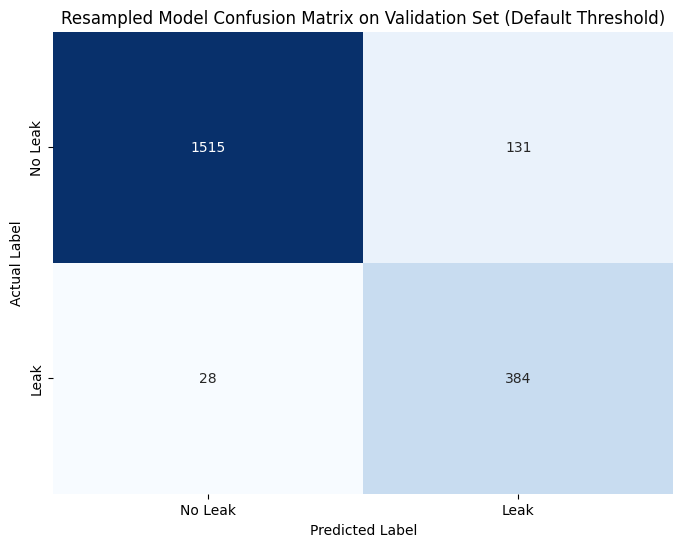


--- Plotting Precision, Recall, and F1-score vs. Threshold ---


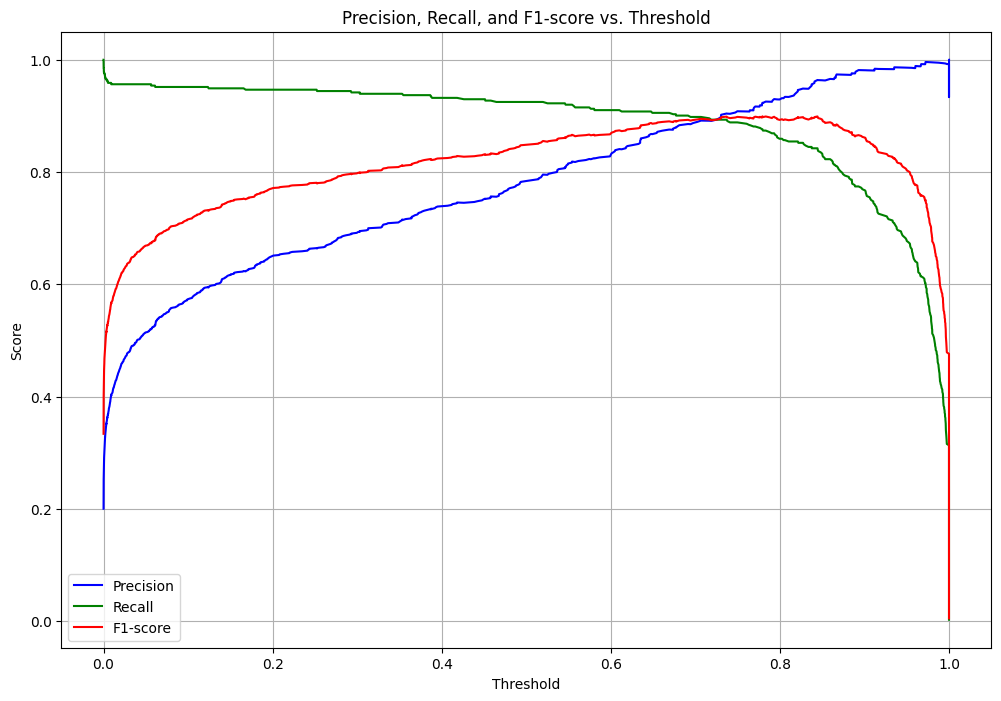

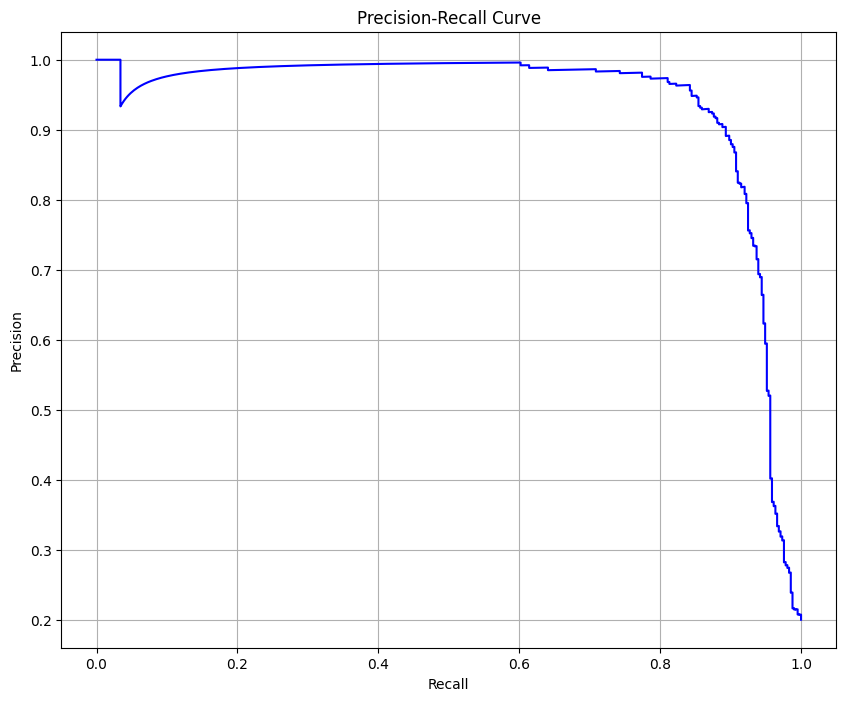


--- Calculating and Plotting False Positives vs. Threshold ---


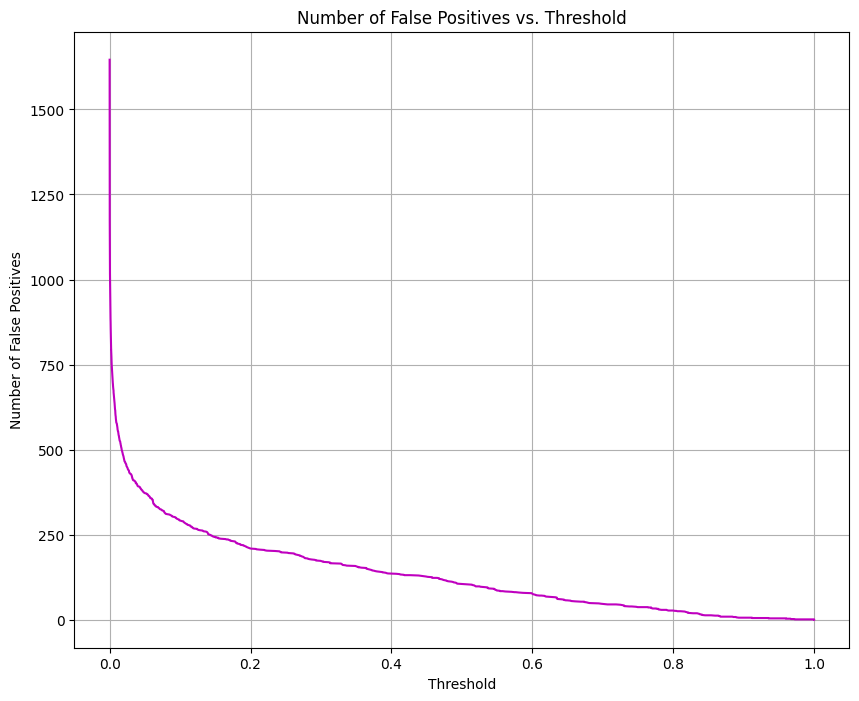


--- Optimal Threshold for Resampled Data ---
The optimal threshold to maximize F1-score is: 0.7793


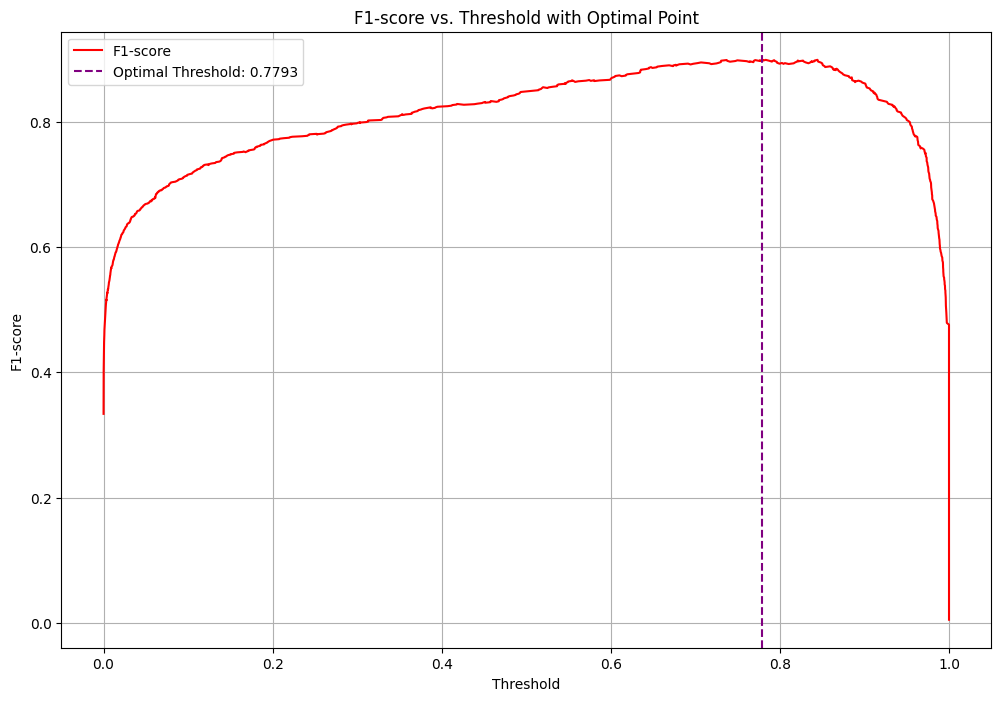

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Resampled Model Training and Evaluation ---

print("--- Training SVM model on resampled data ---")
model_smote_trained = SVC(random_state=42, probability=True)
model_smote_trained.fit(X_train_resampled, y_train_resampled)

# Predict on the original validation set to get an initial performance baseline
# These predictions use the default 0.5 threshold
y_pred_smote = model_smote_trained.predict(X_val_scaled)

print("\n--- Initial Performance on Validation Set (default 0.5 threshold) ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_smote))

# Plot initial Confusion Matrix for the resampled model on the validation set
conf_matrix_smote = confusion_matrix(y_val, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title('Resampled Model Confusion Matrix on Validation Set (Default Threshold)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# --- Plotting Metrics vs. Threshold ---

print("\n--- Plotting Precision, Recall, and F1-score vs. Threshold ---")
# Get the probability scores for the positive class (index 1) on the validation set
y_probs_smote = model_smote_trained.predict_proba(X_val_scaled)[:, 1]

# Calculate precision, recall, and threshold values
precisions, recalls, thresholds = precision_recall_curve(y_val, y_probs_smote)

# Calculate F1-scores for each threshold to find the optimal point
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
# Remove the last element of f1_scores as it is NaN
f1_scores = f1_scores[:-1]

# Plot Precision, Recall vs. Threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1-score')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recalls, precisions, 'b-')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# --- Calculate and Plot the Number of False Positives vs. Threshold ---

print("\n--- Calculating and Plotting False Positives vs. Threshold ---")
false_positives = []
for t in thresholds:
    y_pred_t = (y_probs_smote >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_t).ravel()
    false_positives.append(fp)

plt.figure(figsize=(10, 8))
plt.plot(thresholds, false_positives, 'm-')
plt.title('Number of False Positives vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of False Positives')
plt.grid(True)
plt.show()

# --- Finding and Printing the Optimal Threshold ---

# Find the threshold that maximizes the F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print("\n--- Optimal Threshold for Resampled Data ---")
print(f"The optimal threshold to maximize F1-score is: {optimal_threshold:.4f}")

# Plot F1-score vs. Threshold to visualize the optimal point
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, 'r-', label='F1-score')
plt.axvline(x=optimal_threshold, color='purple', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.title('F1-score vs. Threshold with Optimal Point')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Re-evaluating Resampled Model Performance with the Optimal Threshold

--- Final Model Performance on Validation Set (Optimal Threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1646
           1       0.92      0.88      0.90       412

    accuracy                           0.96      2058
   macro avg       0.95      0.93      0.94      2058
weighted avg       0.96      0.96      0.96      2058



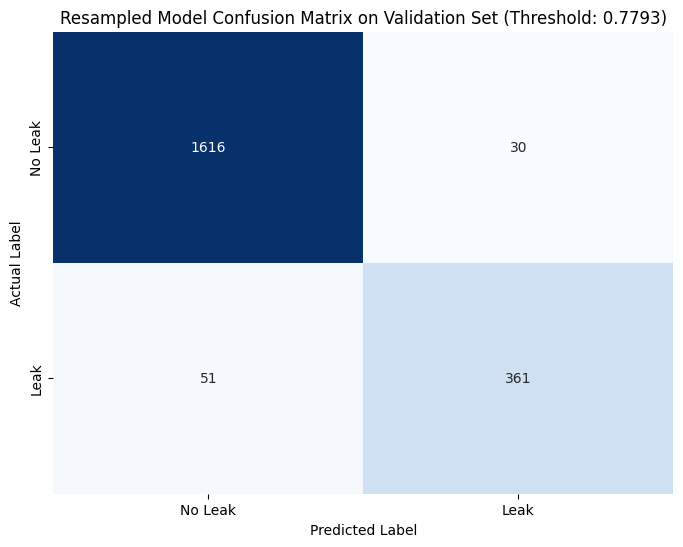

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make new predictions for the validation set based on the optimal threshold from previous cell
y_pred_smote_optimized = (y_probs_smote >= optimal_threshold).astype(int)

# Re-evaluate the model with the new predictions
print("--- Final Model Performance on Validation Set (Optimal Threshold) ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_smote_optimized))

# Plot the final Confusion Matrix
conf_matrix_smote_optimized = confusion_matrix(y_val, y_pred_smote_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote_optimized, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Resampled Model Confusion Matrix on Validation Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Final Resampled Model Evaluation on the Test Set

--- Final Model Performance on Test Set (Resampled + Optimal Threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1647
           1       0.93      0.89      0.91       412

    accuracy                           0.96      2059
   macro avg       0.95      0.94      0.94      2059
weighted avg       0.96      0.96      0.96      2059



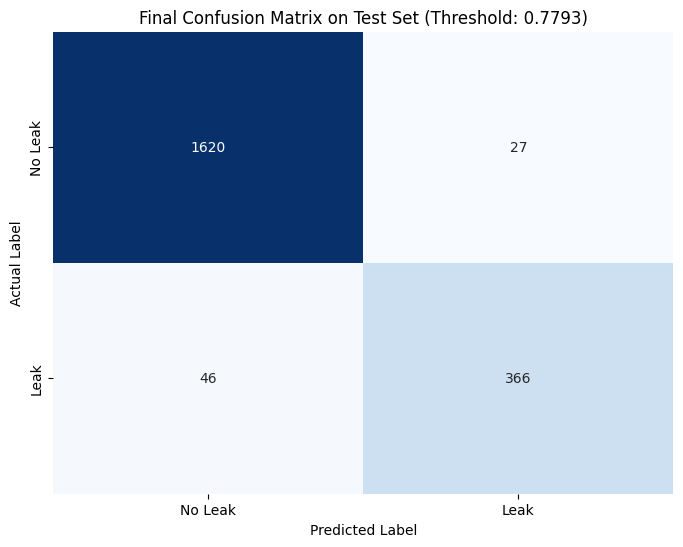

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probability scores for the test set
# Used the model trained on resampled data from previous cell
y_probs_smote_test = model_smote_trained.predict_proba(X_test_scaled)[:, 1]

# Make new predictions for the test set based on the optimal threshold
# determined on the validation set from previous cell.
y_pred_smote_optimized_test = (y_probs_smote_test >= optimal_threshold).astype(int)

# Evaluate the model with the new predictions on the test set
print("--- Final Model Performance on Test Set (Resampled + Optimal Threshold) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_smote_optimized_test))

# Plot the final Confusion Matrix for the test set
conf_matrix_smote_optimized_test = confusion_matrix(y_test, y_pred_smote_optimized_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote_optimized_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Final Confusion Matrix on Test Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Hyperparameter Tuning for the Resampled Model

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer

print("--- Starting Hyperparameter Tuning with GridSearchCV ---")
tuned_model = SVC(random_state=42, probability=True)

# Define the parameter grid to search over.
# 'C': Regularization parameter. Smaller values mean stronger regularization.
# 'gamma': Kernel coefficient for 'rbf' kernel.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Define the scoring metric. The F1-score is a good choice for balanced data.
scoring_metric = make_scorer(f1_score)

# Initialize StratifiedKFold for consistent cross-validation splits
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tuned_model,
    param_grid=param_grid,
    scoring=scoring_metric,
    cv=cv_stratified,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

print("\n--- Hyperparameter Tuning Complete ---")

# Print the best parameters and the best F1-score found
print("Best hyperparameters found:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Save the best estimator for later use
best_model = grid_search.best_estimator_

--- Starting Hyperparameter Tuning with GridSearchCV ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  18.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  33.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  34.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  18.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  21.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  39.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  40.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time

Evaluation and Threshold Plotting for Tuned Resampled Model

--- Initial Performance on Validation Set (default 0.5 threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1847
           1       0.91      0.46      0.61       211

    accuracy                           0.94      2058
   macro avg       0.92      0.73      0.79      2058
weighted avg       0.94      0.94      0.93      2058



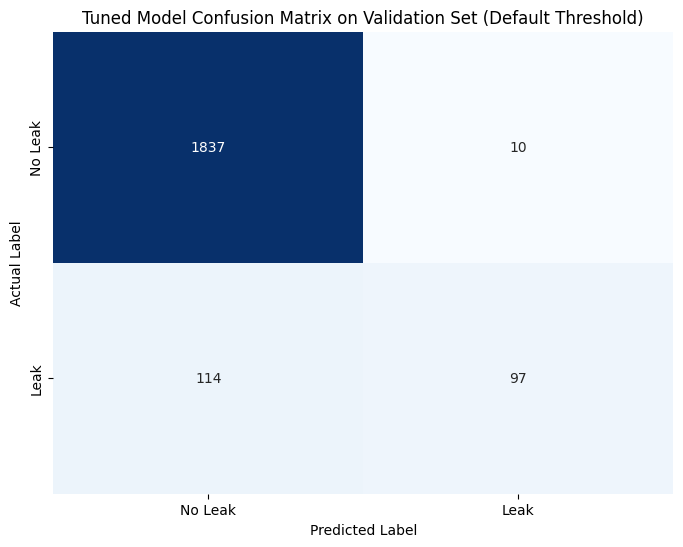


--- Plotting Precision, Recall, and F1-score vs. Threshold ---


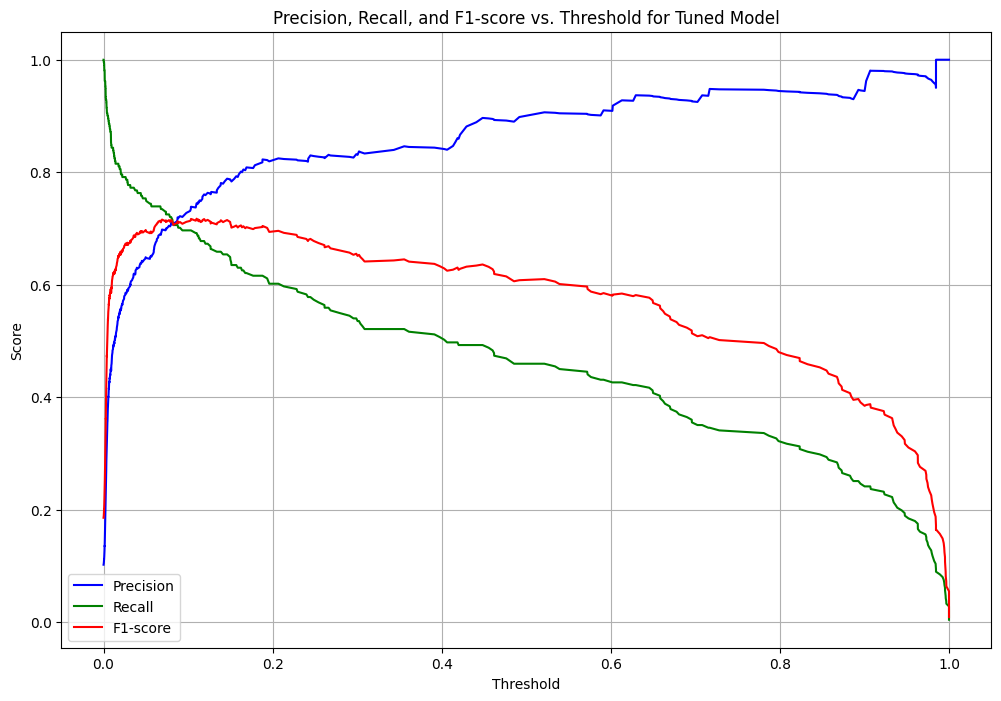

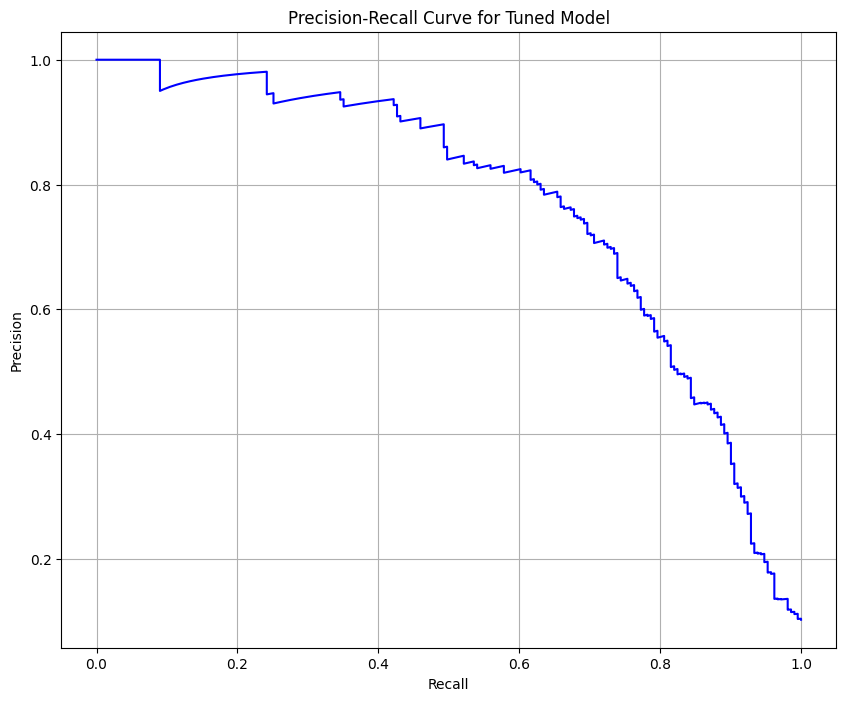


--- Calculating and Plotting False Positives vs. Threshold ---


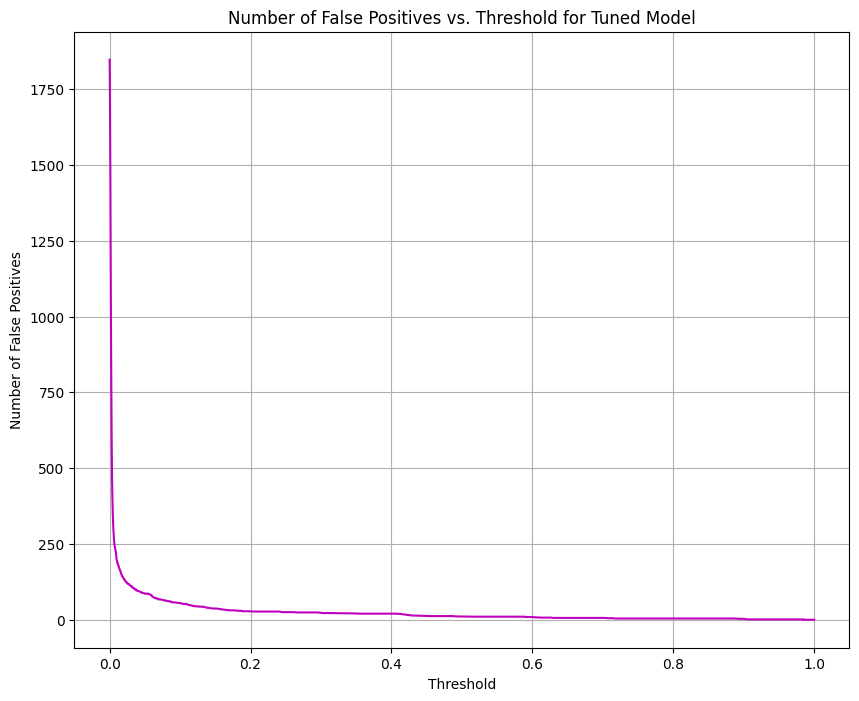


--- Optimal Threshold for Tuned Resampled Model ---
The optimal threshold to maximize F1-score is: 0.1101


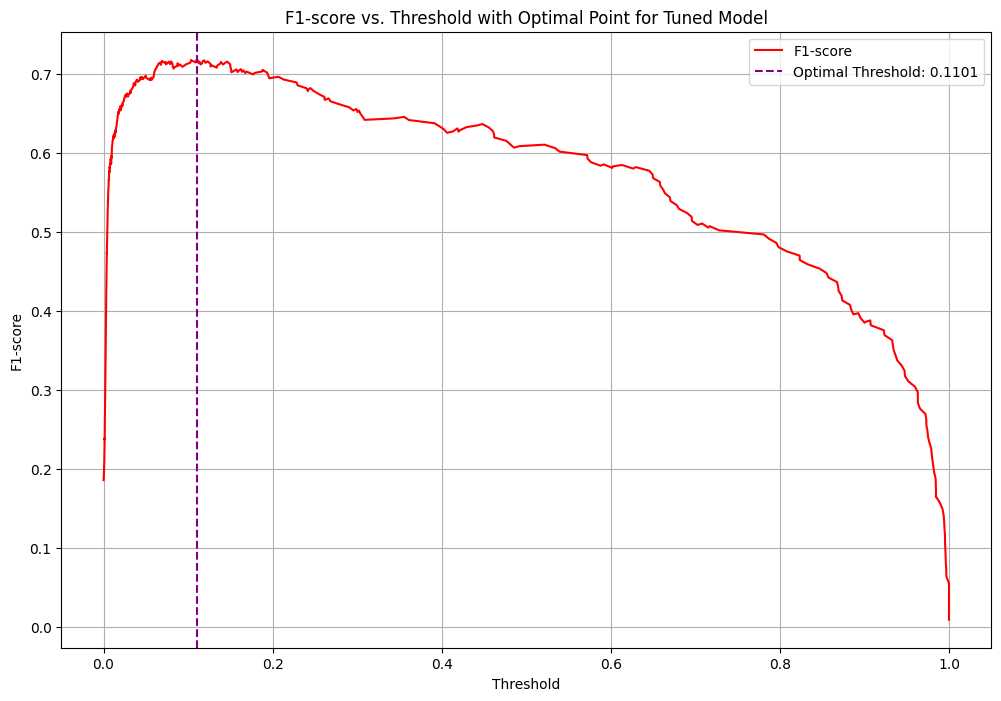

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tuned Model Training and Evaluation ---

# The best model from GridSearchCV is already available in the 'best_model' variable
print("--- Initial Performance on Validation Set (default 0.5 threshold) ---")

# Get the probability scores for the positive class (index 1) on the validation set
y_probs_tuned = best_model.predict_proba(X_val_scaled)[:, 1]

# Make predictions using the default 0.5 threshold for an initial look
y_pred_tuned_default = (y_probs_tuned >= 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_val, y_pred_tuned_default))

# Plot initial Confusion Matrix for the tuned model on the validation set
conf_matrix_tuned = confusion_matrix(y_val, y_pred_tuned_default)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title('Tuned Model Confusion Matrix on Validation Set (Default Threshold)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# --- Plotting Metrics vs. Threshold ---

print("\n--- Plotting Precision, Recall, and F1-score vs. Threshold ---")
# Calculate precision, recall, and threshold values
precisions, recalls, thresholds = precision_recall_curve(y_val, y_probs_tuned)

# Calculate F1-scores for each threshold to find the optimal point
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
# Remove the last element of f1_scores as it is NaN
f1_scores = f1_scores[:-1]

# Plot Precision, Recall vs. Threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1-score')
plt.title('Precision, Recall, and F1-score vs. Threshold for Tuned Model')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recalls, precisions, 'b-')
plt.title('Precision-Recall Curve for Tuned Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# --- Calculate and Plot the Number of False Positives vs. Threshold ---

print("\n--- Calculating and Plotting False Positives vs. Threshold ---")
false_positives = []
for t in thresholds:
    y_pred_t = (y_probs_tuned >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_t).ravel()
    false_positives.append(fp)

plt.figure(figsize=(10, 8))
plt.plot(thresholds, false_positives, 'm-')
plt.title('Number of False Positives vs. Threshold for Tuned Model')
plt.xlabel('Threshold')
plt.ylabel('Number of False Positives')
plt.grid(True)
plt.show()

# --- Finding and Printing the Optimal Threshold ---

# Find the threshold that maximizes the F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print("\n--- Optimal Threshold for Tuned Resampled Model ---")
print(f"The optimal threshold to maximize F1-score is: {optimal_threshold:.4f}")

# Plot F1-score vs. Threshold to visualize the optimal point
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, 'r-', label='F1-score')
plt.axvline(x=optimal_threshold, color='purple', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.title('F1-score vs. Threshold with Optimal Point for Tuned Model')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Re-evaluating Tuned Model Performance with the Optimal Threshold

--- Final Tuned Model Performance on Validation Set (Optimal Threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1847
           1       0.74      0.69      0.72       211

    accuracy                           0.94      2058
   macro avg       0.85      0.83      0.84      2058
weighted avg       0.94      0.94      0.94      2058



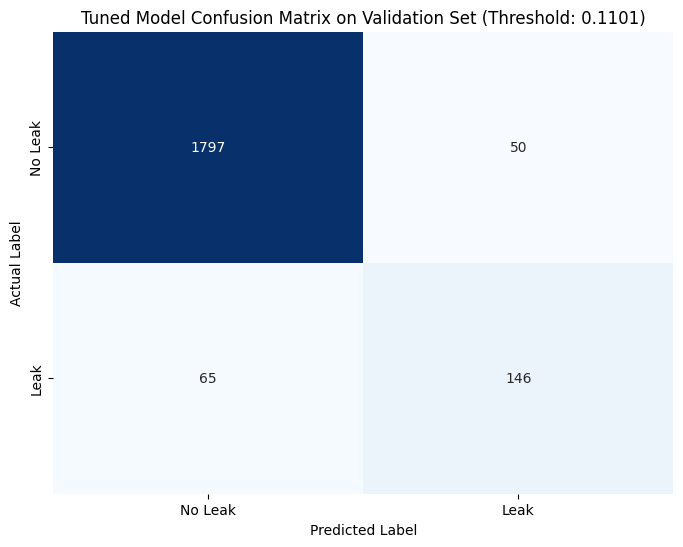

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make new predictions for the validation set based on the optimal threshold
# from Previous cell.
y_pred_tuned_optimized = (y_probs_tuned >= optimal_threshold).astype(int)

# Re-evaluate the model with the new predictions
print("--- Final Tuned Model Performance on Validation Set (Optimal Threshold) ---")
print("Classification Report:")
print(classification_report(y_val, y_pred_tuned_optimized))

# Plot the final Confusion Matrix
conf_matrix_tuned_optimized = confusion_matrix(y_val, y_pred_tuned_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_optimized, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Tuned Model Confusion Matrix on Validation Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Final Tuned Resampled Model Evaluation on the Test Set

--- Final Tuned Model Performance on Test Set (Optimal Threshold) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1848
           1       0.70      0.64      0.67       211

    accuracy                           0.94      2059
   macro avg       0.83      0.81      0.82      2059
weighted avg       0.93      0.94      0.93      2059



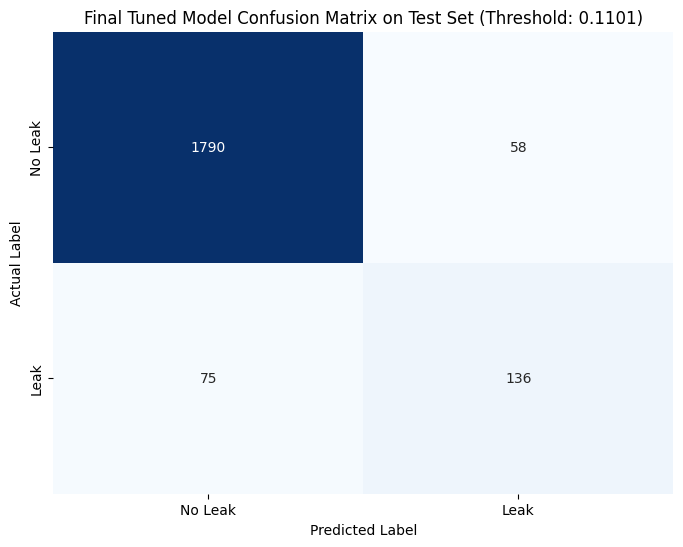

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probability scores for the test set using the tuned model
y_probs_tuned_test = best_model.predict_proba(X_test_scaled)[:, 1]

# Make new predictions for the test set based on the optimal threshold
# determined on the validation set.
y_pred_tuned_optimized_test = (y_probs_tuned_test >= optimal_threshold).astype(int)

# Re-evaluate the model with the new predictions on the test set
print("--- Final Tuned Model Performance on Test Set (Optimal Threshold) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned_optimized_test))

# Plot the final Confusion Matrix for the test set
conf_matrix_tuned_optimized_test = confusion_matrix(y_test, y_pred_tuned_optimized_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_optimized_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Leak', 'Leak'], yticklabels=['No Leak', 'Leak'])
plt.title(f'Final Tuned Model Confusion Matrix on Test Set (Threshold: {optimal_threshold:.4f})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()